##Correlations with RT (for all, by ROI)
* Offset of duration - onset of response (response-locked)
* Onset of response - onset of duration (stimulus locked)
* Time to peak - onset (of duration, stimulus, response (locked))
* Onset of duration - onset of stimulus
* 'single trial' dataset plots
* also run LPFC only

In [2]:
%reset
%pylab inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
import pandas as pd
from scipy import stats
import cPickle as pickle
from __future__ import division

In [4]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
savedir = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'images', 'correlations')

In [6]:
#print np.unique(df.ROI)
LPFC = ['Broca','FrPole','IFG','MFG','MFG_premot','OFC','PreSMA','Pre_centrl','SFG','SMA','dACC','preSMA']

In [25]:
### correlate latency of duration with onset of response

In [186]:
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

#drop response electrodes with no stimulus locked onsets (15)
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")
df_resp = df[df.pattern == 'R']
df_dur =  df[df.pattern == 'D']

#fix response locked - add back median RT
#df_resp['lats_semistatic'] = df_resp.lats_semi_static + df_resp.start_idx_resp + df_resp.RTs_median
#df_resp['start_idx_adjusted'] = df_resp.start_idx_resp + df_resp.RTs_median
#resp locked uses start_idx resp plus median RT
#can try just running it from stimulus locked onset

#keep only datasets that have both dur and resp elecs
datasets = pd.merge(df_dur[['subj','task']], df_resp[['subj','task']]).drop_duplicates() 
df_dur = pd.merge(datasets, df_dur)
df_resp = pd.merge(datasets, df_resp)

D_lats_semistatic = df_dur.groupby(['subj','task'])['lats_semi_static', 'start_idx'].mean() 
D_lats_semistatic = D_lats_semistatic.lats_semi_static + D_lats_semistatic.start_idx
R_onsets = df_resp.groupby(['subj','task'])['start_idx'].mean()
rts = df_dur.groupby(['subj','task'])['RTs_median'].mean()

correlation between D peak latency and R onsets (semi static window): 0.70, p = 0.000
/home/knight/matar/MATLAB/DATA/Avgusta/PCA/ShadePlots_hclust/elecs/significance_windows/smoothed/mean_traces/images/correlations


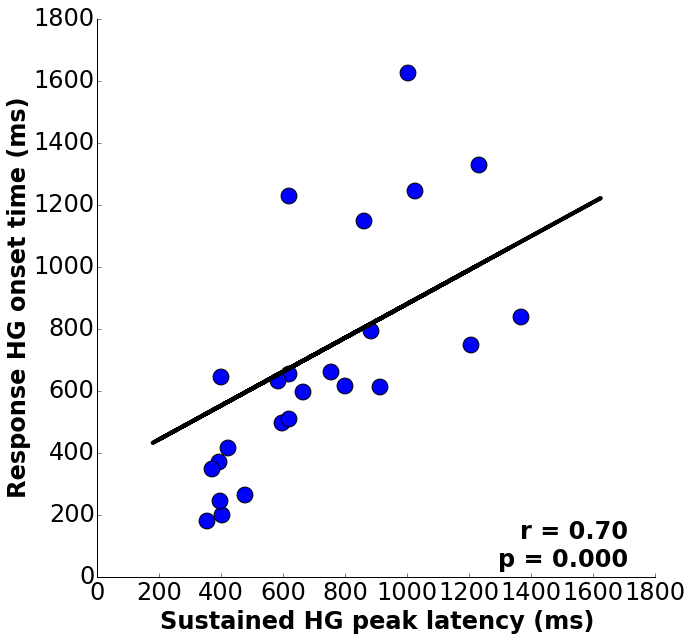

In [189]:

print 'correlation between D peak latency and R onsets (semi static window): %.2f, p = %.3f' %(stats.pearsonr(D_lats_semistatic, R_onsets))

f, ax = plt.subplots(1,1, figsize = (10,10))
    
ax.patch.set_facecolor('white')
ax.autoscale(tight=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.xaxis.set_tick_params(labelsize = 24)
ax.yaxis.set_tick_params(labelsize = 24)

R, p = stats.pearsonr(D_lats_semistatic, R_onsets)

A = np.vstack([R_onsets,np.ones(len(R_onsets))]).T
m,c = np.linalg.lstsq(A,np.array(D_lats_semistatic))[0]
ax.plot(R_onsets,R_onsets*m+c, color = 'k', linewidth = 4, label = 'r = %.2f\np = %.3f' %(R, p)) 
ax.text(0.95, 0.01, 'r = %.2f\np = %.3f' %(R, p), transform = ax.transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')


ax.scatter(D_lats_semistatic,R_onsets, marker = 'o', s = 250)
#ax.set_title('resp onsets vs duration semi static latency:\n R = %.2f, p = %.3f' %(stats.pearsonr(D_lats_semistatic, R_onsets)))
ax.set_xlabel('Sustained HG peak latency (ms)',weight = 'bold', fontsize = 24)
ax.set_ylabel('Response HG onset time (ms)',weight = 'bold', fontsize = 24)

'''
## partial correlation - remove effect of RT

#X = D_lats_semistatic
#Y = R_onsets
#Z = rts

Rxy, pxy = stats.pearsonr(D_lats_semistatic, R_onsets)
Rxz, pxz = stats.pearsonr(D_lats_semistatic, rts)
Ryz, pyz = stats.pearsonr(R_onsets, rts)

print (Rxy, Rxz, Ryz, R_onsets.shape)
print pxy

par_corr = (Rxy - (Rxz * Ryz)) / (np.sqrt(1-Rxz**2) * (np.sqrt(1-Ryz**2)))
print par_corr
'''
'''
#drop GP28 SelfAud outlier
tmp = D_lats_semistatic.reset_index()
idx = tmp[(tmp.subj == 'GP28') & (tmp.task == 'SelfAud')].index.tolist()
tmp = tmp.drop(idx)
R_onsets = R_onsets.reset_index().drop(idx).start_idx
D_lats_semistatic = tmp.lats_semi_static

print 'correlation between D peak latency and R onsets (semi static window) outlier dropped: %.2f, p = %.3f' %(stats.pearsonr(D_lats_semistatic, R_onsets))

ax[1].plot(D_lats_semistatic,R_onsets,'o')
ax[1].set_title('resp onsets vs duration semi static latency:\n R = %.2f, p = %.3f' %(stats.pearsonr(D_lats_semistatic, R_onsets)))
ax[1].set_ylabel('response HG onset (ms)')
ax[1].set_xlabel('duration peak latency (ms)')

'''

filename = os.path.join(savedir, 'D_peaklatency_vs_R_HGonset.png')
plt.savefig(filename)
print savedir

In [134]:
df_resp.query('subj == "ST15"')[['elec','lats_semi_static','start_idx_resp','RTs_median']]
#df_resp.lats_semi_static + df_resp.start_idx_resp + df_resp.RTs_median - adjusted peak

'''
ONSETS AREN'T COMPLETLEY ACCUATE WHEN TAKING RESP LOCKED START IDX AND ADJUSTING RELATIVE TO MEDIAN RT
'''

,elec,lats_semi_static,start_idx_resp,RTs_median
159,11,499.383962,-499,1713.929011
160,18,160.235405,-499,1713.929011
161,19,171.048837,-499,1713.929011
162,41,64.880593,-499,1713.929011
163,93,128.778148,-499,1713.929011


correlation between RTs and lag between D peak latency and R onsets : 0.37, p = 0.073
/home/knight/matar/MATLAB/DATA/Avgusta/PCA/ShadePlots_hclust/elecs/significance_windows/smoothed/mean_traces/images/correlations
correlation between RTs and lag between D peak latency and D onsets : 0.60, p = 0.000
/home/knight/matar/MATLAB/DATA/Avgusta/PCA/ShadePlots_hclust/elecs/significance_windows/smoothed/mean_traces/images/correlations


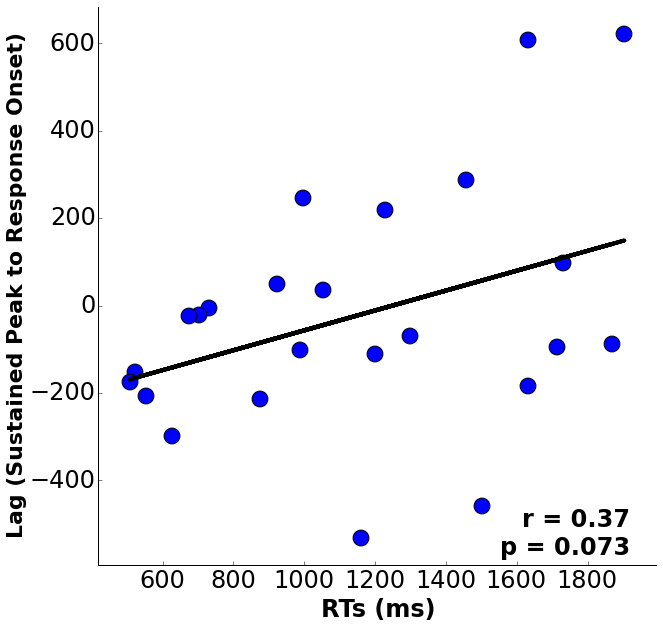

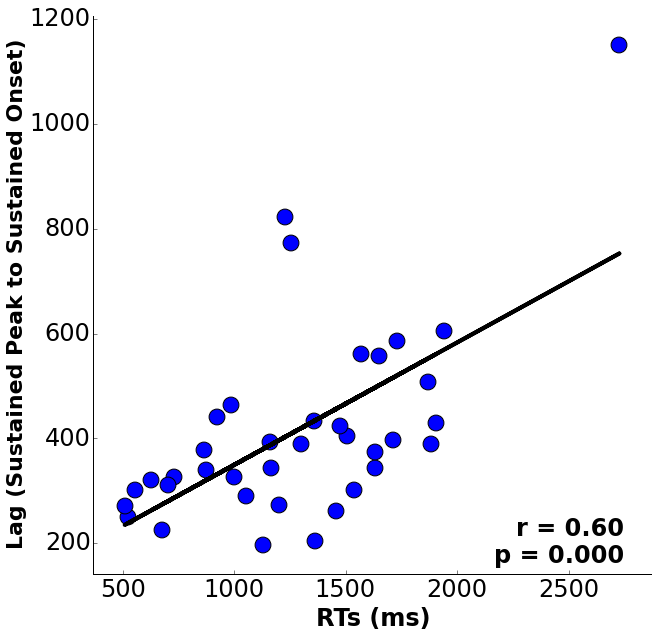

In [192]:
##correlate lag between duration peak latency and resp onset with RT (also for dur onset)
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

#drop response electrodes with no stimulus locked onsets (15)
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")
df_resp = df[df.pattern == 'R']
df_dur =  df[df.pattern == 'D']

#fix response locked - add back median RT
#df_resp['lats_semistatic'] = df_resp.lats_semi_static + df_resp.start_idx_resp + df_resp.RTs_median
#df_resp['start_idx_adjusted'] = df_resp.start_idx_resp + df_resp.RTs_median
#resp locked uses start_idx resp plus median RT
#can try just running it from stimulus locked onset

#keep only datasets that have both dur and resp elecs
datasets = pd.merge(df_dur[['subj','task']], df_resp[['subj','task']]).drop_duplicates() 
df_dur = pd.merge(datasets, df_dur)
df_resp = pd.merge(datasets, df_resp)

D_lats_semistatic = df_dur.groupby(['subj','task'])['lats_semi_static', 'start_idx'].mean() 
D_lats_semistatic = D_lats_semistatic.lats_semi_static + D_lats_semistatic.start_idx
#R_onsets = df_resp.groupby(['subj','task'])['start_idx_resp'].mean() + df_resp.groupby(['subj','task'])['RTs_median'].mean()
R_onsets = df_resp.groupby(['subj','task'])['start_idx'].mean()
rts = df_dur.groupby(['subj','task'])['RTs_median'].mean()
DR_lag = R_onsets - D_lats_semistatic

print 'correlation between RTs and lag between D peak latency and R onsets : %.2f, p = %.3f' %(stats.pearsonr(DR_lag, rts))

f, ax = plt.subplots(1,1, figsize = (10,10))
    
ax.patch.set_facecolor('white')
ax.autoscale(tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.xaxis.set_tick_params(labelsize = 24)
ax.yaxis.set_tick_params(labelsize = 24)

R, p = stats.pearsonr(DR_lag, rts)

A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(DR_lag))[0]
ax.plot(rts,rts*m+c, color = 'k', linewidth = 4, label = 'r = %.2f\np = %.3f' %(R, p)) 
ax.text(0.95, 0.01, 'r = %.2f\np = %.3f' %(R, p), transform = ax.transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')


ax.scatter(rts,DR_lag, marker = 'o', s = 250)
ax.set_xlabel('RTs (ms)',weight = 'bold', fontsize = 24)
ax.set_ylabel('Lag (Sustained Peak to Response Onset)',weight = 'bold', fontsize = 22)


filename = os.path.join(savedir, 'DR_lag_vs_rts.png')
plt.savefig(filename)
print savedir


## for duration onset with lag
D_lats_semistatic = df.groupby(['subj','task'])['lats_semi_static', 'start_idx'].mean() 
D_lats_semistatic = D_lats_semistatic.lats_semi_static + D_lats_semistatic.start_idx
D_onsets = df.groupby(['subj','task'])['start_idx'].mean()
rts = df.groupby(['subj','task'])['RTs_median'].mean()
DD_lag =D_lats_semistatic -  D_onsets

print 'correlation between RTs and lag between D peak latency and D onsets : %.2f, p = %.3f' %(stats.pearsonr(DD_lag, rts))

f, ax = plt.subplots(1,1, figsize = (10,10))
    
ax.patch.set_facecolor('white')
ax.autoscale(tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.xaxis.set_tick_params(labelsize = 24)
ax.yaxis.set_tick_params(labelsize = 24)

R, p = stats.pearsonr(DD_lag, rts)

A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(DD_lag))[0]
ax.plot(rts,rts*m+c, color = 'k', linewidth = 4, label = 'r = %.2f\np = %.3f' %(R, p)) 
ax.text(0.95, 0.01, 'r = %.2f\np = %.3f' %(R, p), transform = ax.transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')


ax.scatter(rts,DD_lag, marker = 'o', s = 250)
ax.set_xlabel('RTs (ms)',weight = 'bold', fontsize = 24)
ax.set_ylabel('Lag (Sustained Peak to Sustained Onset)',weight = 'bold', fontsize = 22)


filename = os.path.join(savedir, 'DD_lag_vs_rts.png')
plt.savefig(filename)
print savedir

In [7]:
### offset of duration - onset of response (response locked)

In [5]:
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs_resplocked.csv')
df_resp = pd.read_csv(filename)

#drop response electrodes with no stimulus locked onsets (15)
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")
df_resp = df_resp.query("subj not in ['GP27', 'ST28', 'GP44']")
df_dur =  df[df.pattern == 'D']

In [9]:
datasets = pd.merge(df_dur[['subj','task']], df_resp[['subj','task']]).drop_duplicates() 
#keep only datasets that have both dur and resp elecs
df_dur = pd.merge(datasets, df_dur)
df_resp = pd.merge(datasets, df_resp)

correlation between RT and difference between duration offset and resp onset (response locked): -0.37, p = 0.06
LFPC only - correlation between RT and difference between duration offset and resp onset (response locked): -0.17, p = 0.49


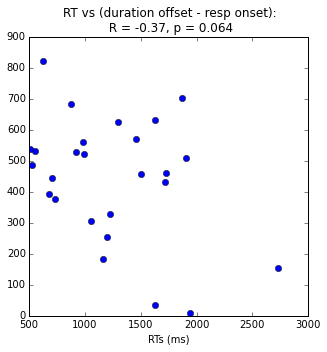

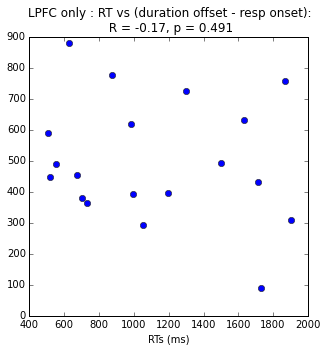

In [11]:
dur_to_resp = df_dur.groupby(['subj','task']).end_idx_resp.mean() - df_resp.groupby(['subj','task']).start_idx_resp.mean()
rts = df_dur.groupby(['subj','task']).RTs_median.mean()

print 'correlation between RT and difference between duration offset and resp onset (response locked): %.2f, p = %.2f' %(stats.pearsonr(dur_to_resp, rts))

f, ax = plt.subplots(figsize = (5,5))
ax.plot(rts, dur_to_resp, 'o')
ax.set_title('RT vs (duration offset - resp onset):\n R = %.2f, p = %.3f' %(stats.pearsonr(dur_to_resp, rts)))
ax.set_xlabel('RTs (ms)')

filename = os.path.join(savedir, 'RT_vs_duroffset-responset.png')
plt.savefig(filename)

#LPFC ONLY
df_dur = df_dur[df_dur.ROI.isin(LPFC)]
df_resp = df_resp[df_resp.ROI.isin(LPFC)]

dur_to_resp = df_dur.groupby(['subj','task']).end_idx_resp.mean() - df_resp.groupby(['subj','task']).start_idx_resp.mean()
idx = dur_to_resp[np.isnan(dur_to_resp)].index
dur_to_resp = dur_to_resp.dropna()

rts = df_dur.groupby(['subj','task']).RTs_median.mean()
rts = rts.drop(idx)

print 'LFPC only - correlation between RT and difference between duration offset and resp onset (response locked): %.2f, p = %.2f' %(stats.pearsonr(dur_to_resp, rts))

f, ax = plt.subplots(figsize = (5,5))
ax.plot(rts, dur_to_resp, 'o')
ax.set_title('LPFC only : RT vs (duration offset - resp onset):\n R = %.2f, p = %.3f' %(stats.pearsonr(dur_to_resp, rts)))
ax.set_xlabel('RTs (ms)')

filename = os.path.join(savedir, 'RT_vs_duroffset-responset_LPFC.png')
plt.savefig(filename)

In [264]:
### Onset of response - onset of duration (stimulus locked)
#edited for MAX

In [81]:
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

#drop bad subjs
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

#drop elecs with no stim-locked response activity
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

df_resp = df[df.pattern == 'R']
df_dur = df[df.pattern == 'D']
datasets = pd.merge(df_dur[['subj','task']], df_resp[['subj','task']]).drop_duplicates()
df = pd.merge(datasets, df) #keep only datasets that have both dur and resp elecs

#adjust onset times for my task (so from stim, not cue)
idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500
#aud - 600ms
#vis - 500ms

correlation between RT and difference between onset of duration and onset of resp: 0.42, p = 0.039
LPFC only: correlation between RT and difference between onset of duration and onset of resp: 0.38, p = 0.125


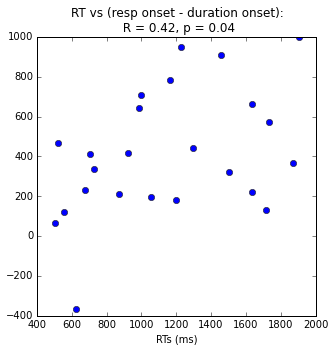

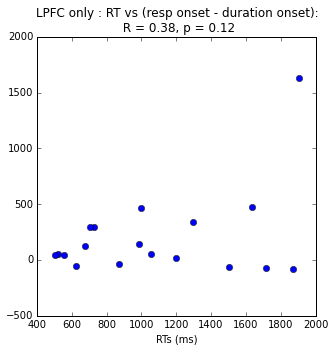

In [82]:
#correlation between HGonset lag between D and R
rts = df.groupby(['subj','task']).RTs_median.mean()
dur_onset = df[df.pattern == 'D'].groupby(['subj','task'])['start_idx'].max()
resp_onset = df[df.pattern == 'R'].groupby(['subj','task'])['start_idx'].max()

print 'correlation between RT and difference between onset of duration and onset of resp: %.2f, p = %.3f' %(stats.pearsonr(resp_onset-dur_onset, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, resp_onset-dur_onset,'o')
ax.set_title('RT vs (resp onset - duration onset):\n R = %.2f, p = %.2f' %(stats.pearsonr(resp_onset-dur_onset, rts)))
ax.set_xlabel('RTs (ms)')

filename = os.path.join(savedir, 'RT_vs_responset-duronset_max.png')
plt.savefig(filename)

#LPFC ONLY
df = df[df.ROI.isin(LPFC)]
rts = df.groupby(['subj','task']).RTs_median.mean()
dur_onset = df[df.pattern == 'D'].groupby(['subj','task'])['start_idx'].mean()
resp_onset = df[df.pattern == 'R'].groupby(['subj','task'])['start_idx'].mean()

#drop datasets without both dur and resp
resp_to_dur = resp_onset-dur_onset
idx = resp_to_dur[np.isnan(resp_to_dur)].index
resp_to_dur = resp_to_dur.dropna()
rts = rts.drop(idx)

print 'LPFC only: correlation between RT and difference between onset of duration and onset of resp: %.2f, p = %.3f' %(stats.pearsonr(resp_to_dur, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, resp_to_dur,'o')
ax.set_title('LPFC only : RT vs (resp onset - duration onset):\n R = %.2f, p = %.2f' %(stats.pearsonr(resp_to_dur, rts)))
ax.set_xlabel('RTs (ms)')

#filename = os.path.join(savedir, 'RT_vs_responset-duronset_LPFC.png')
#plt.savefig(filename)


correlation between RT and difference between semi static peak latency of duration and semi static peak latency of resp (adjusted): 0.23, p = 0.277


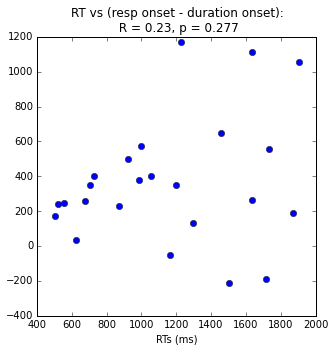

In [198]:
# correlation between latency lag between D and R
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

#drop bad subjs
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

#drop elecs with no stim-locked response activity
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

df_resp = df[df.pattern == 'R']
df_dur = df[df.pattern == 'D']
datasets = pd.merge(df_dur[['subj','task']], df_resp[['subj','task']]).drop_duplicates()
df = pd.merge(datasets, df) #keep only datasets that have both dur and resp elecs

#adjust onset times for my task (so from stim, not cue)
idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500

df['lats_semi_static_adjusted'] = df.lats_semi_static + df.start_idx #adjust for start time - so both start from zero

rts = df.groupby(['subj','task']).RTs_median.mean()
dur_peak = df[df.pattern == 'D'].groupby(['subj','task'])['lats_semi_static_adjusted'].mean()
resp_peak = df[df.pattern == 'R'].groupby(['subj','task'])['lats_semi_static_adjusted'].mean()

print 'correlation between RT and difference between semi static peak latency of duration and semi static peak latency of resp (adjusted): %.2f, p = %.3f' %(stats.pearsonr(resp_peak-dur_peak, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, resp_peak - dur_peak,'o')
ax.set_title('RT vs (resp onset - duration onset):\n R = %.2f, p = %.3f' %(stats.pearsonr(resp_peak-dur_peak, rts)))
ax.set_xlabel('RTs (ms)')

filename = os.path.join(savedir, 'RT_vs_resp-dur_lats_semi_static_adj.png')
plt.savefig(filename)


In [14]:
### Time to peak - onset (of duration, stimulus, response (locked))
#latencies are calculated from start_idx, so no need to subtract

In [10]:
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs_resplocked.csv')
df_resp = pd.read_csv(filename)

df = df.query("subj not in ['GP27', 'ST28', 'GP44']")
df_resp = df_resp.query("subj not in ['GP27', 'ST28', 'GP44']")

rts = df.groupby(['subj','task']).RTs_median.mean()

#adjust onset times for my task (so from stim, not cue)
idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600

idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500

correlation between RT and difference between onset and peak latency of D: 0.72, p = 0.000
LFPC only: correlation between RT and difference between onset and peak latency of D: 0.61, p = 0.001
correlation between RT and peak amp of D: -0.09, p = 0.64
LFPC only: correlation between RT and peak amp of D: -0.01, p = 0.97


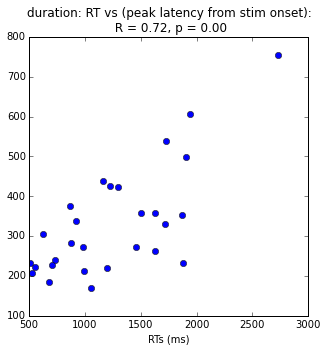

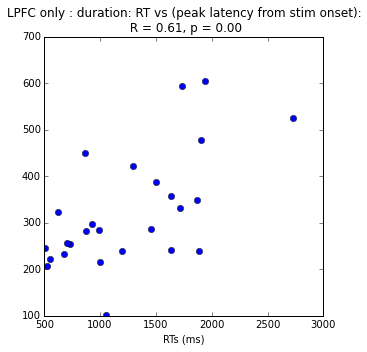

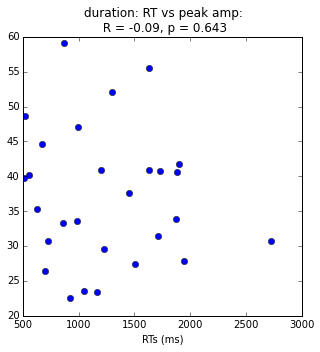

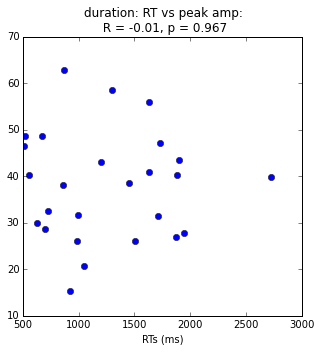

In [16]:
#PEAKS
D_lats = df[df.pattern == 'D'].groupby(['subj','task'])['lats'].mean() #changes if take mean
rts = df[df.pattern== 'D'].groupby(['subj','task']).RTs_median.mean()
print 'correlation between RT and difference between onset and peak latency of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, D_lats,'o')
ax.set_title('duration: RT vs (peak latency from stim onset):\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_duration.png')
plt.savefig(filename)

#LFPC only
D_lats = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats'].mean() #changes if take mean
rts = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()
print 'LFPC only: correlation between RT and difference between onset and peak latency of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, D_lats,'o')
ax.set_title('LPFC only : duration: RT vs (peak latency from stim onset):\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_duration_LPFC.png')
plt.savefig(filename)

#MAXES
D_max = df[df.pattern == 'D'].groupby(['subj','task'])['maxes'].mean() #changes if take mean
rts = df[df.pattern== 'D'].groupby(['subj','task']).RTs_median.mean()
print 'correlation between RT and peak amp of D: %.2f, p = %.2f' %(stats.pearsonr(D_max, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, D_max,'o')
ax.set_title('duration: RT vs peak amp:\n R = %.2f, p = %.3f' %(stats.pearsonr(D_max, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_maxes_duration.png')
plt.savefig(filename)

#LPFC only
D_max = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['maxes'].mean() #changes if take mean
rts = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()
print 'LFPC only: correlation between RT and peak amp of D: %.2f, p = %.2f' %(stats.pearsonr(D_max, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, D_max,'o')
ax.set_title('duration: RT vs peak amp:\n R = %.2f, p = %.3f' %(stats.pearsonr(D_max, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_maxes_duration_LPFC.png')
plt.savefig(filename)


correlation between RT and min latency of D: 0.91, p = 0.000
LFPC only: correlation between RT and min latency of D: 0.87, p = 0.00


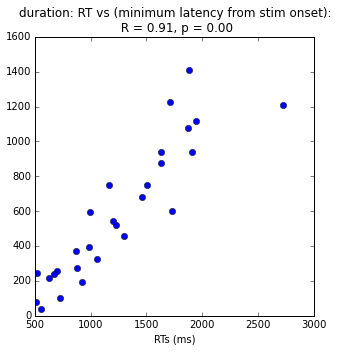

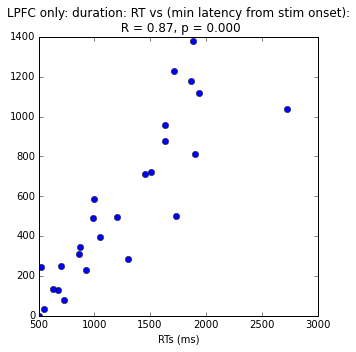

In [17]:
D_lats_min = df[df.pattern == 'D'].groupby(['subj','task'])['lats_min'].mean() 
rts = df[df.pattern== 'D'].groupby(['subj','task']).RTs_median.mean()
print 'correlation between RT and min latency of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats_min, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, D_lats_min,'o')
ax.set_title('duration: RT vs (minimum latency from stim onset):\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats_min, rts)))
ax.set_xlabel('RTs (ms)')

filename = os.path.join(savedir, 'RT_vs_lats_min_duration.png')
plt.savefig(filename)

#LPFC only
D_lats_min = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats_min'].mean() #changes if take mean
rts = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()
print 'LFPC only: correlation between RT and min latency of D: %.2f, p = %.2f' %(stats.pearsonr(D_lats_min, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, D_lats_min,'o')
ax.set_title('LPFC only: duration: RT vs (min latency from stim onset):\n R = %.2f, p = %.3f' %(stats.pearsonr(D_lats_min, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_min_duration_LPFC.png')
plt.savefig(filename)

correlation between RT and peak latency (static window) of D: 0.80, p = 0.000
LFPC only: correlation between RT and peak latency (static window) of D: 0.83, p = 0.00


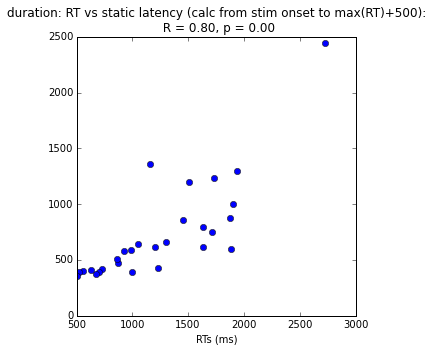

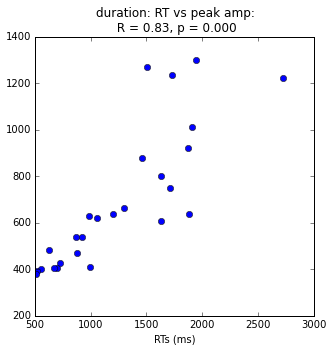

In [18]:
#static latencies
D_lats_static = df[df.pattern == 'D'].groupby(['subj','task'])['lats_static'].mean() #changes if take mean
rts = df[df.pattern== 'D'].groupby(['subj','task']).RTs_median.mean()
print 'correlation between RT and peak latency (static window) of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats_static, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, D_lats_static,'o')
ax.set_title('duration: RT vs static latency (calc from stim onset to max(RT)+500):\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats_static, rts)))
ax.set_xlabel('RTs (ms)')

filename = os.path.join(savedir, 'RT_vs_lats_static_duration.png')
plt.savefig(filename)

#LPFC only
D_lats_static = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats_static'].mean() #changes if take mean
rts = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()
print 'LFPC only: correlation between RT and peak latency (static window) of D: %.2f, p = %.2f' %(stats.pearsonr(D_lats_static, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, D_lats_static,'o')
ax.set_title('duration: RT vs peak amp:\n R = %.2f, p = %.3f' %(stats.pearsonr(D_lats_static, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_static_duration_LPFC.png')
plt.savefig(filename)

correlation between RT and peak latency (semi static window) of D: 0.63, p = 0.000
correlation between RT and peak latency (semi static window) drop outlier of D: 0.40, p = 0.041
LPFC only: correlation between RT and peak latency (semistatic window) of D: 0.59, p = 0.00
LPFC only: correlation between RT and peak latency (semi static window) drop outlier of D: 0.54, p = 0.005


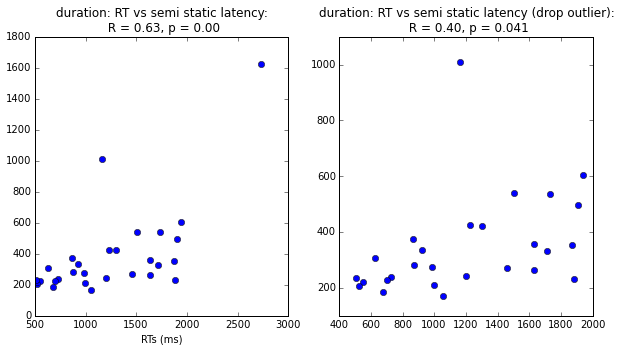

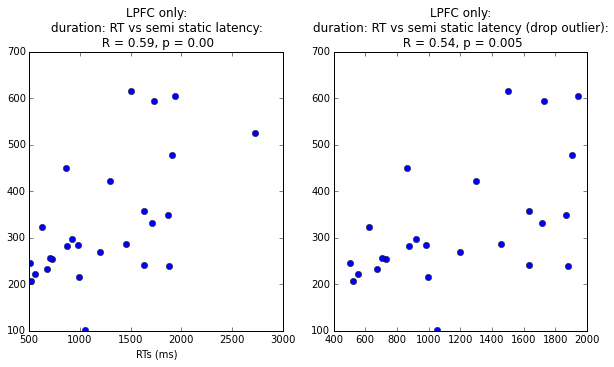

In [19]:
#semi static latencies (HG onset to max RT+500)
D_lats_semistatic = df[df.pattern == 'D'].groupby(['subj','task'])['lats_semi_static'].mean() 
rts = df[df.pattern== 'D'].groupby(['subj','task']).RTs_median.mean()
print 'correlation between RT and peak latency (semi static window) of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats_semistatic, rts))

f, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(rts, D_lats_semistatic,'o')
ax[0].set_title('duration: RT vs semi static latency:\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats_semistatic, rts)))
ax[0].set_xlabel('RTs (ms)')

#drop ST1 EmoGen outlier
tmp = D_lats_semistatic.reset_index()
idx = tmp[(tmp.subj == 'ST1') & (tmp.task == 'EmoGen')].index.tolist()
tmp = tmp.drop(idx)
rts = rts.reset_index().drop(idx)

ax[1].plot(rts.RTs_median, tmp.lats_semi_static,'o')
ax[1].set_title('duration: RT vs semi static latency (drop outlier):\n R = %.2f, p = %.3f' %(stats.pearsonr(tmp.lats_semi_static, rts.RTs_median)))
ax[0].set_xlabel('RTs (ms)')

print 'correlation between RT and peak latency (semi static window) drop outlier of D: %.2f, p = %.3f' %(stats.pearsonr(tmp.lats_semi_static, rts.RTs_median))

filename = os.path.join(savedir, 'RT_vs_lats_semi_static_duration.png')
plt.savefig(filename)

#LPFC only
D_lats_semistatic = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats_semi_static'].mean()
rts = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()
print 'LPFC only: correlation between RT and peak latency (semistatic window) of D: %.2f, p = %.2f' %(stats.pearsonr(D_lats_semistatic, rts))

f, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(rts, D_lats_semistatic,'o')
ax[0].set_title('LPFC only:\nduration: RT vs semi static latency:\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats_semistatic, rts)))
ax[0].set_xlabel('RTs (ms)')

#drop ST1 EmoGen outlier
tmp = D_lats_semistatic.reset_index()
idx = tmp[(tmp.subj == 'ST1') & (tmp.task == 'EmoGen')].index.tolist()
tmp = tmp.drop(idx)
rts = rts.reset_index().drop(idx)

ax[1].plot(rts.RTs_median, tmp.lats_semi_static,'o')
ax[1].set_title('LPFC only:\nduration: RT vs semi static latency (drop outlier):\n R = %.2f, p = %.3f' %(stats.pearsonr(tmp.lats_semi_static, rts.RTs_median)))
ax[0].set_xlabel('RTs (ms)')

print 'LPFC only: correlation between RT and peak latency (semi static window) drop outlier of D: %.2f, p = %.3f' %(stats.pearsonr(tmp.lats_semi_static, rts.RTs_median))

filename = os.path.join(savedir, 'RT_vs_lats_semi_static_duration_LPFC.png')
plt.savefig(filename)



correlation between latency to RT with RT (semi static window) of D: 0.57, p = 0.002
LPFC only: correlation between latency to RT with RT (semi static window) of D: 0.89, p = 0.000

/srv/local/anaconda-1.9.2/lib/python2.7/site-packages/IPython/kernel/__main__.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/srv/local/anaconda-1.9.2/lib/python2.7/site-packages/IPython/kernel/__main__.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



correlation between latency to RT with RT (semi static window) of R: 0.94, p = 0.000
/home/knight/matar/MATLAB/DATA/Avgusta/PCA/ShadePlots_hclust/elecs/significance_windows/smoothed/mean_traces/images/correlations
correlation between latency to RT with RT (semi static window) of SR: 0.86, p = 0.000
correlation between latency to RT with RT (semi static window) of S: 0.72, p = 0.002
/home/knight/matar/MATLAB/DATA/Avgusta/PCA/ShadePlots_hclust/elecs/significance_windows/smoothed/mean_traces/images/correlations


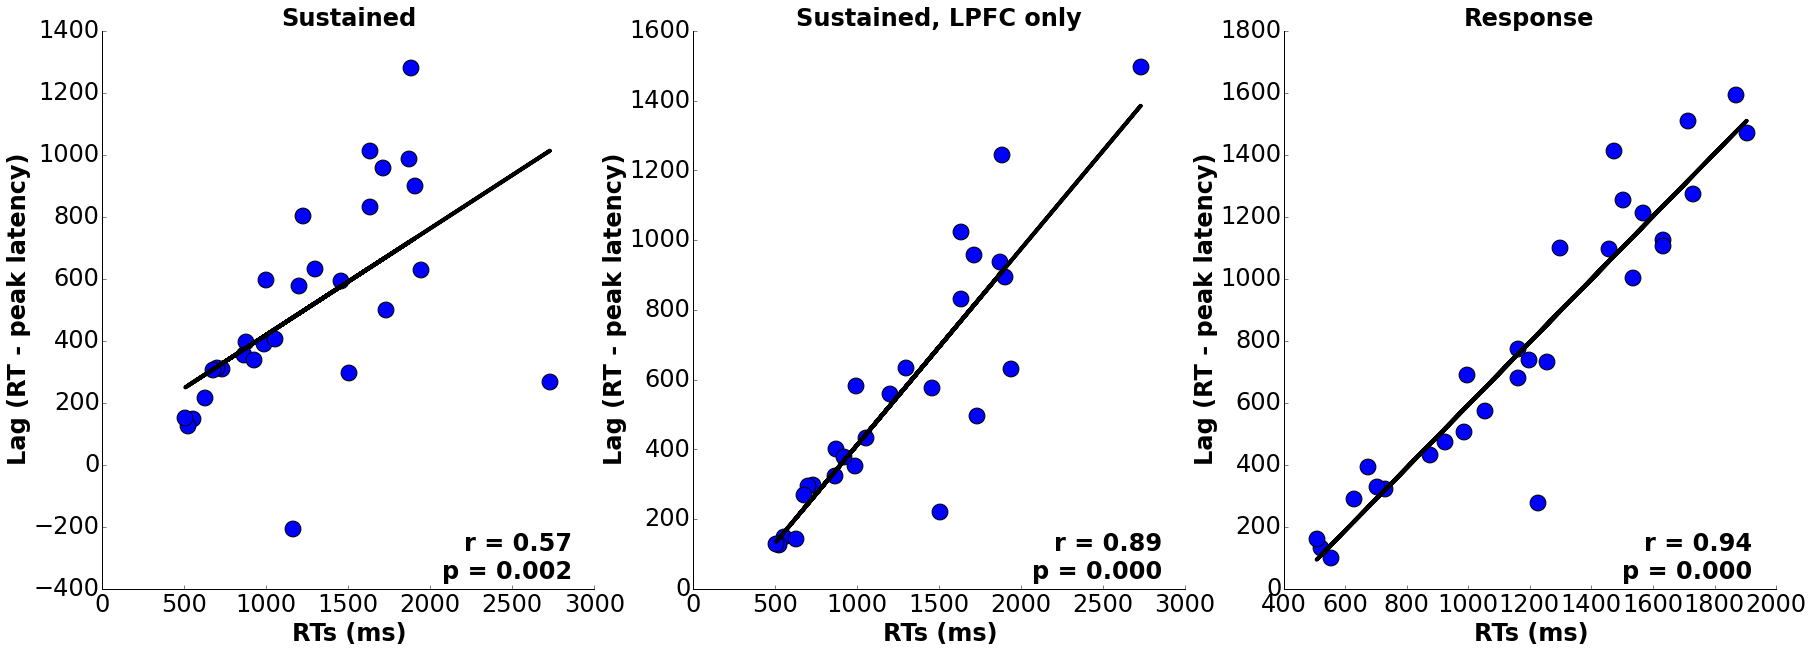

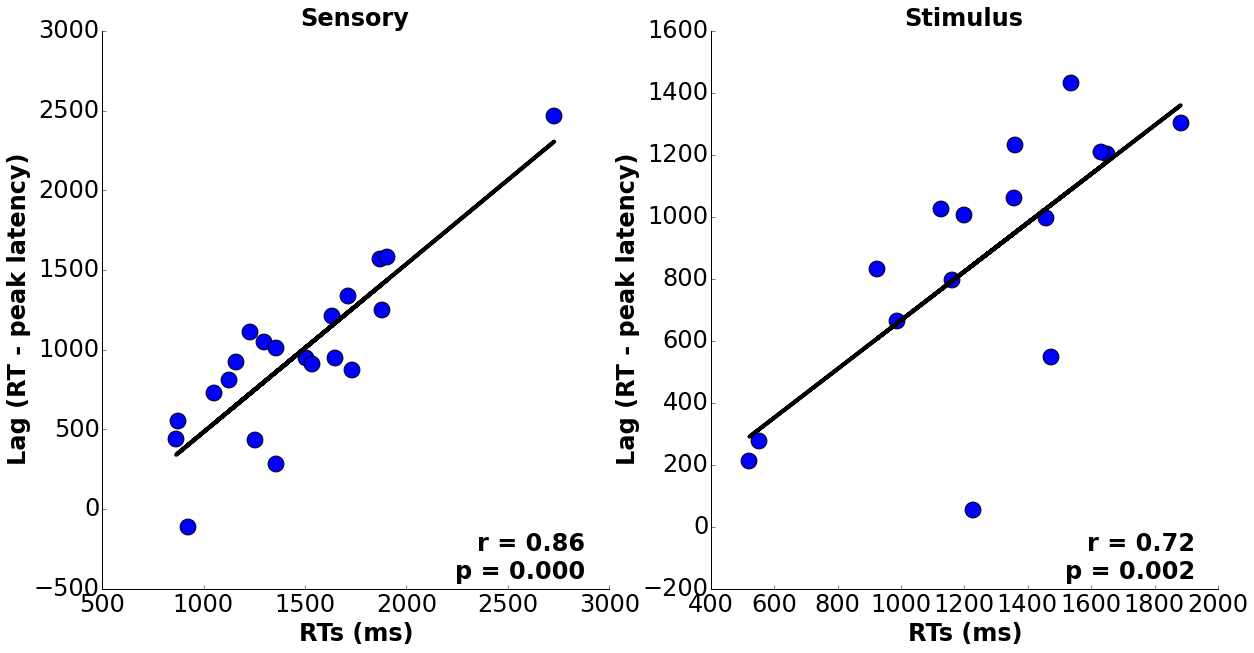

In [117]:
#semi static latencies (HG onset to max RT+500) lag to RT. 
#Because semi-static is from HG onset, need to add the start_idx back to the latency 
#so have the same zero point as RTs

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

df = df.query("subj not in ['GP27', 'ST28', 'GP44']")
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500


D_lats_semistatic = df[df.pattern == 'D'].groupby(['subj','task'])['lats_semi_static'].mean() 
start_idx = df[df.pattern == 'D'].groupby(['subj','task'])['start_idx'].mean()
D_lats_semistatic = D_lats_semistatic + start_idx #adjust latencies

rts = df[df.pattern== 'D'].groupby(['subj','task']).RTs_median.mean()
D_lag = rts - D_lats_semistatic


print 'correlation between latency to RT with RT (semi static window) of D: %.2f, p = %.3f' %(stats.pearsonr(D_lag, rts))
f, ax = plt.subplots(1,3, figsize = (30,10))
for i,x in enumerate(ax):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize = 24)
    ax[i].yaxis.set_tick_params(labelsize = 24)
    ax[i].set_xlabel('RTs (ms)',weight = 'bold', fontsize = 24)
    ax[i].set_ylabel('Lag (RT - peak latency)',weight = 'bold', fontsize = 24)

ax[0].scatter(rts, D_lag, marker = 'o', s = 250)
ax[0].set_title('Sustained', weight = 'bold', fontsize = 24)

R, p = stats.pearsonr(rts, D_lag)
A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(D_lag))[0]
ax[0].plot(rts,rts*m+c, color = 'k', linewidth = 4, label = 'r = %.2f\np = %.3f' %(R, p)) 
ax[0].text(0.95, 0.01, 'r = %.2f\np = %.3f' %(R, p), transform = ax[0].transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')


#LPFC only
D_lats_semistatic = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats_semi_static'].mean()
start_idx = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['start_idx'].mean()
D_lats_semistatic = D_lats_semistatic + start_idx

rts = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()
D_lag = rts - D_lats_semistatic
print 'LPFC only: correlation between latency to RT with RT (semi static window) of D: %.2f, p = %.3f' %(stats.pearsonr(D_lag, rts))

ax[1].scatter(rts, D_lag, marker = 'o', s = 250)
ax[1].set_title('Sustained, LPFC only', weight = 'bold', fontsize = 24)

R, p = stats.pearsonr(rts, D_lag)
A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(D_lag))[0]
ax[1].plot(rts,rts*m+c, color = 'k', linewidth = 4, label = 'r = %.2f\np = %.3f' %(R, p)) 
ax[1].text(0.95, 0.01, 'r = %.2f\np = %.3f' %(R, p), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')

#resp
df_resp = df[df.pattern == 'R']

#fix response locked - add back median RT
df_resp['lats_semistatic'] = df_resp.lats_semi_static + df_resp.start_idx_resp + df_resp.RTs_median
df_resp['start_idx_adjusted'] = df_resp.start_idx_resp + df_resp.RTs_median

R_lats_semistatic = df_resp.groupby(['subj','task'])['lats_semi_static'].mean() 
start_idx = df_resp.groupby(['subj','task'])['start_idx_adjusted'].mean()

rts = df[df.pattern== 'R'].groupby(['subj','task']).RTs_median.mean()
R_lag = rts - R_lats_semistatic

print 'correlation between latency to RT with RT (semi static window) of R: %.2f, p = %.3f' %(stats.pearsonr(R_lag, rts))

ax[2].scatter(rts, R_lag, marker = 'o', s = 250)
ax[2].set_title('Response', weight = 'bold', fontsize = 24)

R, p = stats.pearsonr(rts, R_lag)
A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(R_lag))[0]
ax[2].plot(rts,rts*m+c, color = 'k', linewidth = 4, label = 'r = %.2f\np = %.3f' %(R, p)) 
ax[2].text(0.95, 0.01, 'r = %.2f\np = %.3f' %(R, p), transform = ax[2].transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')

filename = os.path.join(savedir, 'RTlag_vs_lats_semi_static_duration_resp.png')
#plt.savefig(filename)
print savedir

### stim
f, ax = plt.subplots(1,2, figsize = (20,10))
for i,x in enumerate(ax):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize = 24)
    ax[i].yaxis.set_tick_params(labelsize = 24)
    ax[i].set_xlabel('RTs (ms)',weight = 'bold', fontsize = 24)
    ax[i].set_ylabel('Lag (RT - peak latency)',weight = 'bold', fontsize = 24)


SR_lats_semistatic = df[df.pattern == 'SR'].groupby(['subj','task'])['lats_semi_static'].mean() 
start_idx = df[df.pattern == 'SR'].groupby(['subj','task'])['start_idx'].mean()
SR_lats_semistatic = SR_lats_semistatic + start_idx

rts = df[df.pattern== 'SR'].groupby(['subj','task']).RTs_median.mean()
SR_lag = rts - SR_lats_semistatic

print 'correlation between latency to RT with RT (semi static window) of SR: %.2f, p = %.3f' %(stats.pearsonr(SR_lag, rts))

ax[0].scatter(rts, SR_lag, marker = 'o', s = 250)
ax[0].set_title('Sensory', weight = 'bold', fontsize = 24)

R, p = stats.pearsonr(rts, SR_lag)
A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(SR_lag))[0]
ax[0].plot(rts,rts*m+c, color = 'k', linewidth = 4, label = 'r = %.2f\np = %.3f' %(R, p)) 
ax[0].text(0.95, 0.01, 'r = %.2f\np = %.3f' %(R, p), transform = ax[0].transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')


S_lats_semistatic = df[df.pattern == 'S'].groupby(['subj','task'])['lats_semi_static'].mean() 
start_idx = df[df.pattern == 'S'].groupby(['subj','task'])['start_idx'].mean()
S_lats_semistatic = S_lats_semistatic + start_idx

rts = df[df.pattern== 'S'].groupby(['subj','task']).RTs_median.mean()
S_lag = rts - S_lats_semistatic

print 'correlation between latency to RT with RT (semi static window) of S: %.2f, p = %.3f' %(stats.pearsonr(S_lag, rts))

ax[1].scatter(rts, S_lag, marker = 'o', s = 250)
ax[1].set_title('Stimulus', weight = 'bold', fontsize = 24)

R, p = stats.pearsonr(rts, S_lag)
A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(S_lag))[0]
ax[1].plot(rts,rts*m+c, color = 'k', linewidth = 4, label = 'r = %.2f\np = %.3f' %(R, p)) 
ax[1].text(0.95, 0.01, 'r = %.2f\np = %.3f' %(R, p), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')

filename = os.path.join(savedir, 'RTlag_vs_lats_semi_static_S_SR.png')
#plt.savefig(filename)
print savedir

In [16]:
np.corrcoef((rts.values - D_lats_semistatic.values), rts.values)

array([[ 1.        ,  0.97621326],
       [ 0.97621326,  1.        ]])

correlation between RT and peak latency (normalized) of D: -0.57, p = 0.002
correlation between RT and peak latency (static normalized) of D: -0.05, p = 0.781
correlation between RT and peak latency (semi static normalized) of D: -0.15, p = 0.432
LPFC only: correlation between RT and peak latency (normalized) of D: -0.64, p = 0.000
LPFC only: correlation between RT and peak latency (static normalized) of D: -0.48, p = 0.013
LPFC only: correlation between RT and peak latency (semi static normalized) of D: -0.61, p = 0.001


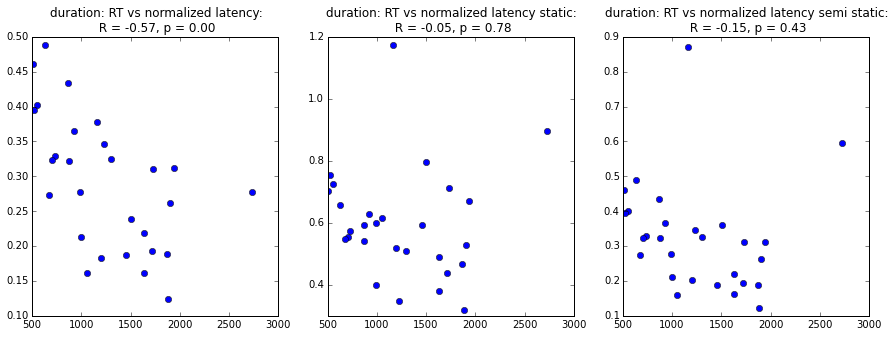

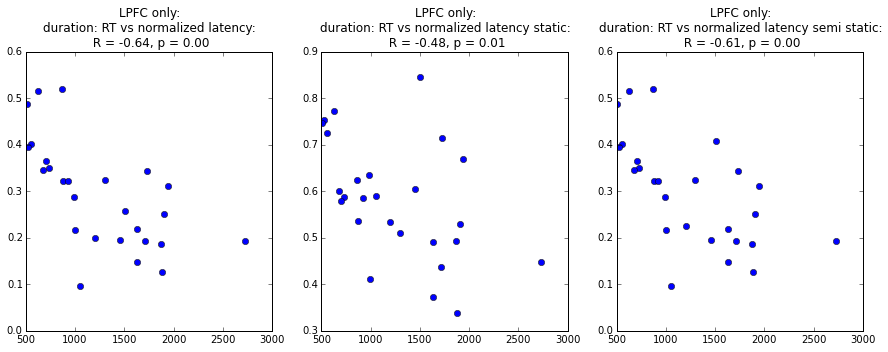

In [20]:
#NORMALIZED latencies
df['lats_norm'] = df.lats / df.RTs_median

D_lats_norm = df[df.pattern == 'D'].groupby(['subj','task'])['lats_norm'].mean()
rts = df[df.pattern== 'D'].groupby(['subj','task']).RTs_median.mean()

print 'correlation between RT and peak latency (normalized) of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats_norm, rts))

df['lats_norm_static'] = df.lats_static / df.RTs_median

D_lats_norm_static = df[df.pattern == 'D'].groupby(['subj','task'])['lats_norm_static'].mean()
rts = df[df.pattern== 'D'].groupby(['subj','task']).RTs_median.mean()

print 'correlation between RT and peak latency (static normalized) of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats_norm_static, rts))

df['lats_norm_semi_static'] = df.lats_semi_static / df.RTs_median
D_lats_norm_semi_static = df[df.pattern == 'D'].groupby(['subj','task'])['lats_norm_semi_static'].mean() 
rts = df[df.pattern== 'D'].groupby(['subj','task']).RTs_median.mean()

f, ax = plt.subplots(1,3, figsize = (15,5))
ax[0].plot(rts, D_lats_norm,'o')
ax[0].set_title('duration: RT vs normalized latency:\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats_norm, rts)))

ax[1].plot(rts, D_lats_norm_static,'o')
ax[1].set_title('duration: RT vs normalized latency static:\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats_norm_static, rts)))

ax[2].plot(rts, D_lats_norm_semi_static,'o')
ax[2].set_title('duration: RT vs normalized latency semi static:\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats_norm_semi_static, rts)))

print 'correlation between RT and peak latency (semi static normalized) of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats_norm_semi_static, rts))


filename = os.path.join(savedir, 'RT_vs_normalized_lats_duration.png')
plt.savefig(filename)


#LPFC ONLY
D_lats_norm = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats_norm'].mean()
rts = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()

print 'LPFC only: correlation between RT and peak latency (normalized) of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats_norm, rts))

D_lats_norm_static = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats_norm_static'].mean()
rts = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()

print 'LPFC only: correlation between RT and peak latency (static normalized) of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats_norm_static, rts))

D_lats_norm_semi_static = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats_norm_semi_static'].mean() 
rts = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()

f, ax = plt.subplots(1,3, figsize = (15,5))
ax[0].plot(rts, D_lats_norm,'o')
ax[0].set_title('LPFC only:\nduration: RT vs normalized latency:\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats_norm, rts)))

ax[1].plot(rts, D_lats_norm_static,'o')
ax[1].set_title('LPFC only:\nduration: RT vs normalized latency static:\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats_norm_static, rts)))

ax[2].plot(rts, D_lats_norm_semi_static,'o')
ax[2].set_title('LPFC only:\nduration: RT vs normalized latency semi static:\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats_norm_semi_static, rts)))

print 'LPFC only: correlation between RT and peak latency (semi static normalized) of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats_norm_semi_static, rts))

filename = os.path.join(savedir, 'RT_vs_normalized_lats_duration_LPFC.png')
plt.savefig(filename)

-c:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1808: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)
-c:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


correlation between RT and peak latency (proportion) of D: -0.37, p = 0.053
LPFC only:
correlation between RT and peak latency (proportion) of D: -0.51, p = 0.007


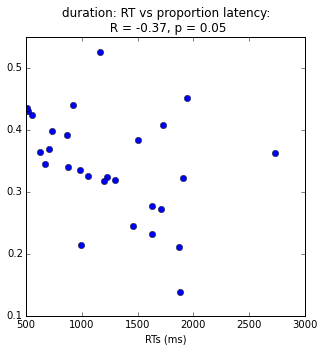

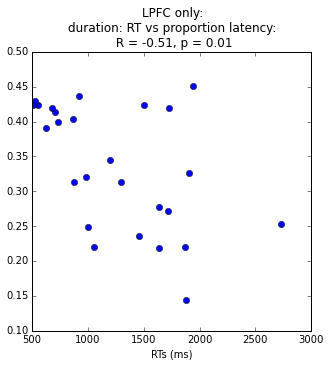

In [21]:
#proportion latency 
df_D = df[(df.pattern == 'D')]
df_D['lats_pro'] = df_D.lats / ((df_D.RTs_median + df_D.end_idx_resp) - df_D.start_idx)
D_lats_pro = df_D[(df.pattern == 'D')].groupby(['subj','task'])['lats_pro'].mean()

rts = df_D[df_D.pattern== 'D'].groupby(['subj','task']).RTs_median.mean()

print 'correlation between RT and peak latency (proportion) of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats_pro, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, D_lats_pro,'o')
ax.set_title('duration: RT vs proportion latency:\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats_pro, rts)))
filename = os.path.join(savedir, 'RT_vs_lats_pro_duration.png')
ax.set_xlabel('RTs (ms)')
plt.savefig(filename)

#LPFC ONLY
df_D = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))]
df_D['lats_pro'] = df_D.lats / ((df_D.RTs_median + df_D.end_idx_resp) - df_D.start_idx)
D_lats_pro = df_D[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats_pro'].mean()

rts = df_D[df_D.pattern== 'D'].groupby(['subj','task']).RTs_median.mean()

print 'LPFC only:\ncorrelation between RT and peak latency (proportion) of D: %.2f, p = %.3f' %(stats.pearsonr(D_lats_pro, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, D_lats_pro,'o')
ax.set_title('LPFC only:\nduration: RT vs proportion latency:\n R = %.2f, p = %.2f' %(stats.pearsonr(D_lats_pro, rts)))
filename = os.path.join(savedir, 'RT_vs_lats_pro_duration_LPFC.png')
ax.set_xlabel('RTs (ms)')
plt.savefig(filename)

correlation between RT and peak latency of S: 0.39, p = 0.137
correlation between RT and peak amp of S: -0.02, p = 0.955
LPFC only: correlation between RT and peak latency of S: 0.20, p = 0.640
LPFC only: correlation between RT and peak amp of S: 0.33, p = 0.428


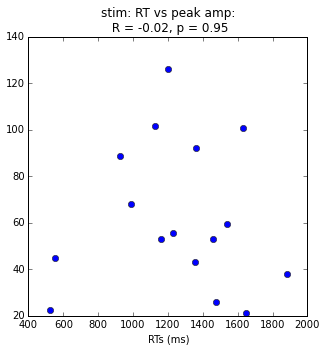

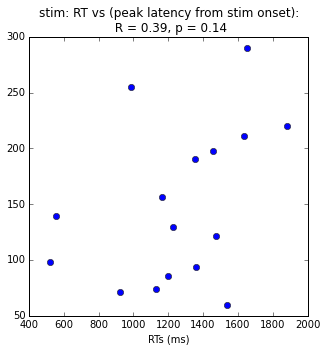

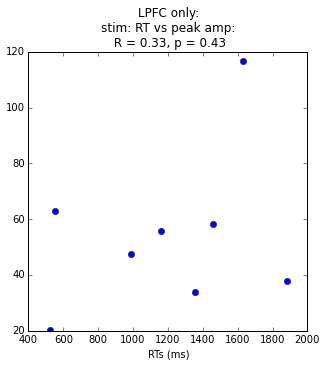

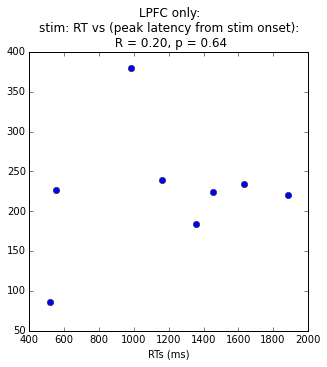

In [23]:
#stimulus - latency
S_lats = df[df.pattern == 'S'].groupby(['subj','task'])['lats'].mean()
rts = df[df.pattern== 'S'].groupby(['subj','task']).RTs_median.mean()
print 'correlation between RT and peak latency of S: %.2f, p = %.3f' %(stats.pearsonr(S_lats, rts))

S_max = df[df.pattern == 'S'].groupby(['subj','task'])['maxes'].mean()

print 'correlation between RT and peak amp of S: %.2f, p = %.3f' %(stats.pearsonr(S_max, rts))

f, ax = plt.subplots(figsize = (5,5))
ax.plot(rts, S_max,'o')
ax.set_title('stim: RT vs peak amp:\n R = %.2f, p = %.2f' %(stats.pearsonr(S_max, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_maxes_stim.png')
plt.savefig(filename)

f, ax = plt.subplots(figsize = (5,5))
ax.plot(rts, S_lats,'o')
ax.set_title('stim: RT vs (peak latency from stim onset):\n R = %.2f, p = %.2f' %(stats.pearsonr(S_lats, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_stim.png')
plt.savefig(filename)

#LPFC ONLY
S_lats = df[(df.pattern == 'S') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats'].mean()
rts = df[(df.pattern == 'S') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()
print 'LPFC only: correlation between RT and peak latency of S: %.2f, p = %.3f' %(stats.pearsonr(S_lats, rts))

S_max = df[(df.pattern == 'S') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['maxes'].mean()

print 'LPFC only: correlation between RT and peak amp of S: %.2f, p = %.3f' %(stats.pearsonr(S_max, rts))

f, ax = plt.subplots(figsize = (5,5))
ax.plot(rts, S_max,'o')
ax.set_title('LPFC only:\nstim: RT vs peak amp:\n R = %.2f, p = %.2f' %(stats.pearsonr(S_max, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_maxes_stim_LPFC.png')
plt.savefig(filename)

f, ax = plt.subplots(figsize = (5,5))
ax.plot(rts, S_lats,'o')
ax.set_title('LPFC only:\nstim: RT vs (peak latency from stim onset):\n R = %.2f, p = %.2f' %(stats.pearsonr(S_lats, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_stim_LPFC.png')
plt.savefig(filename)

correlation between RT and peak latency of S: 0.15, p = 0.586
LPFC only: correlation between RT and peak latency of S (semi-static window): 0.20, p = 0.640
correlation between RT and peak latency of R: -0.04, p = 0.849
LPFC only: correlation between RT and peak latency of R (semi-static window): 0.02, p = 0.940
correlation between RT and peak latency of SR: -0.11, p = 0.633
LPFC only: correlation between RT and peak latency of SR (semi-static window): 0.21, p = 0.531


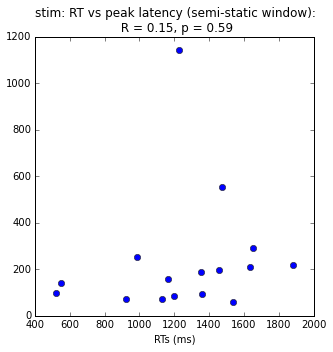

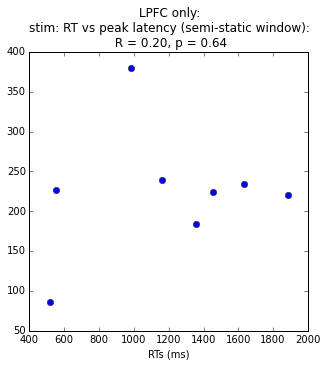

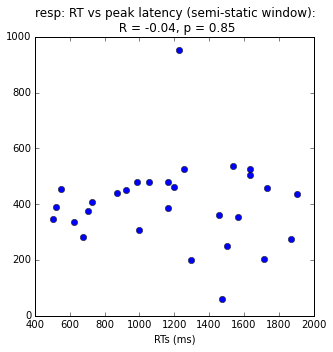

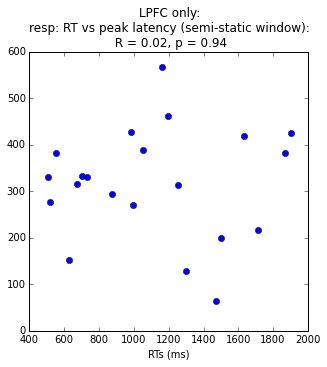

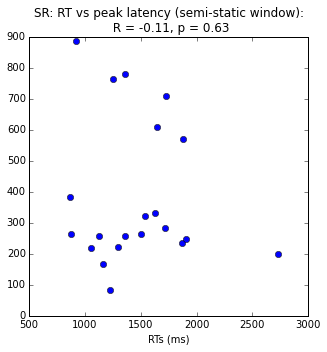

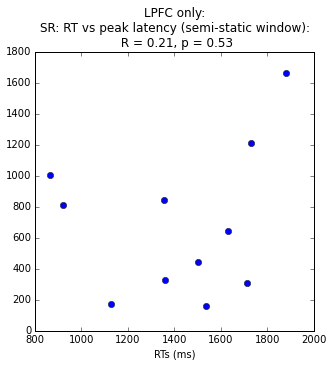

In [42]:
#stimulus - semi-static latency
S_lats = df[df.pattern == 'S'].groupby(['subj','task'])['lats_semi_static'].mean()
rts = df[df.pattern== 'S'].groupby(['subj','task']).RTs_median.mean()
print 'correlation between RT and peak latency of S: %.2f, p = %.3f' %(stats.pearsonr(S_lats, rts))

f, ax = plt.subplots(figsize = (5,5))
ax.plot(rts, S_lats,'o')
ax.set_title('stim: RT vs peak latency (semi-static window):\n R = %.2f, p = %.2f' %(stats.pearsonr(S_lats, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_semi_static_stim.png')
plt.savefig(filename)

#LPFC ONLY
S_lats = df[(df.pattern == 'S') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats_semi_static'].mean()
rts = df[(df.pattern == 'S') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()
print 'LPFC only: correlation between RT and peak latency of S (semi-static window): %.2f, p = %.3f' %(stats.pearsonr(S_lats, rts))

f, ax = plt.subplots(figsize = (5,5))
ax.plot(rts, S_lats,'o')
ax.set_title('LPFC only:\nstim: RT vs peak latency (semi-static window):\n R = %.2f, p = %.2f' %(stats.pearsonr(S_lats, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_semi_static_stim_LPFC.png')
plt.savefig(filename)

#response - semi-static latency
R_lats = df[df.pattern == 'R'].groupby(['subj','task'])['lats_semi_static'].mean()
rts = df[df.pattern== 'R'].groupby(['subj','task']).RTs_median.mean()
print 'correlation between RT and peak latency of R: %.2f, p = %.3f' %(stats.pearsonr(R_lats, rts))

f, ax = plt.subplots(figsize = (5,5))
ax.plot(rts, R_lats,'o')
ax.set_title('resp: RT vs peak latency (semi-static window):\n R = %.2f, p = %.2f' %(stats.pearsonr(R_lats, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_semi_static_resp.png')
plt.savefig(filename)

#LPFC ONLY
R_lats = df[(df.pattern == 'R') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats_semi_static'].mean()
rts = df[(df.pattern == 'R') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()
print 'LPFC only: correlation between RT and peak latency of R (semi-static window): %.2f, p = %.3f' %(stats.pearsonr(R_lats, rts))

f, ax = plt.subplots(figsize = (5,5))
ax.plot(rts, R_lats,'o')
ax.set_title('LPFC only:\nresp: RT vs peak latency (semi-static window):\n R = %.2f, p = %.2f' %(stats.pearsonr(R_lats, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_semi_static_resp_LPFC.png')
plt.savefig(filename)

#SR - semi-static latency
SR_lats = df[df.pattern == 'SR'].groupby(['subj','task'])['lats_semi_static'].mean()
rts = df[df.pattern== 'SR'].groupby(['subj','task']).RTs_median.mean()
print 'correlation between RT and peak latency of SR: %.2f, p = %.3f' %(stats.pearsonr(SR_lats, rts))

f, ax = plt.subplots(figsize = (5,5))
ax.plot(rts, SR_lats,'o')
ax.set_title('SR: RT vs peak latency (semi-static window):\n R = %.2f, p = %.2f' %(stats.pearsonr(SR_lats, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_semi_static_SR.png')
plt.savefig(filename)

#LPFC ONLY
SR_lats = df[(df.pattern == 'SR') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats_semi_static'].mean()
rts = df[(df.pattern == 'SR') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()
print 'LPFC only: correlation between RT and peak latency of SR (semi-static window): %.2f, p = %.3f' %(stats.pearsonr(SR_lats, rts))

f, ax = plt.subplots(figsize = (5,5))
ax.plot(rts, SR_lats,'o')
ax.set_title('LPFC only:\nSR: RT vs peak latency (semi-static window):\n R = %.2f, p = %.2f' %(stats.pearsonr(SR_lats, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_semi_static_SR_LPFC.png')
plt.savefig(filename)

correlation between RT and difference between onset and peak latency of R: -0.20, p = 0.291
correlation between RT and peak amp of R (stimlocked): -0.33, p = 0.076
correlation between RT and peak amp of R (resplocked): 0.26, p = 0.127
LPFC only: correlation between RT and difference between onset and peak latency of R: -0.15, p = 0.519
LPFC only: correlation between RT and peak amp of R (stimlocked): -0.18, p = 0.423
LPFC only: correlation between RT and peak amp of R (resplocked): 0.22, p = 0.292


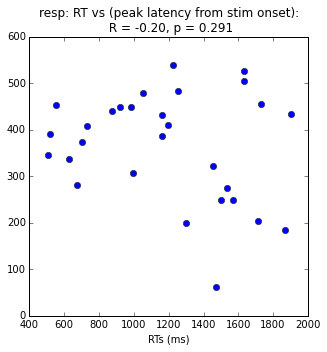

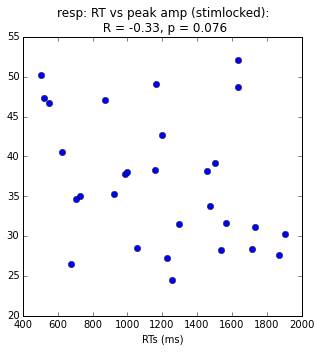

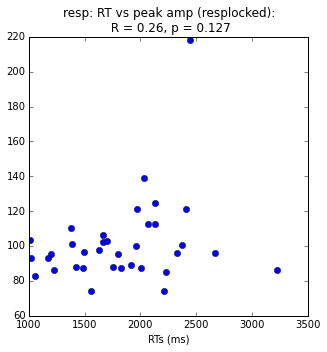

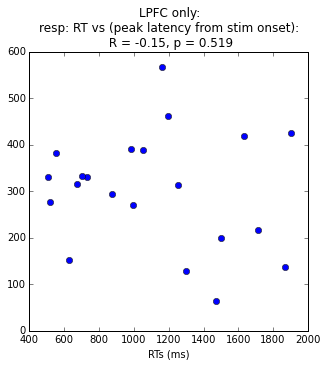

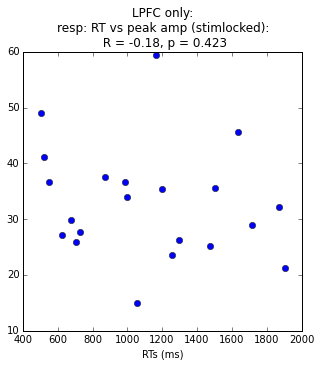

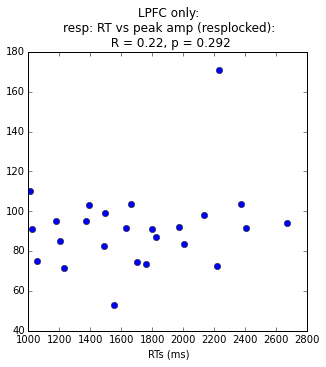

In [24]:
#RESPONSE
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs_resplocked.csv')
df_resp = pd.read_csv(filename)

#drop response electrodes with no stimulus locked onsets (15)
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

R_lats = df[df.pattern == 'R'].groupby(['subj','task'])['lats'].mean()
rts = df[df.pattern == 'R'].groupby(['subj','task']).RTs_median.mean()
print 'correlation between RT and difference between onset and peak latency of R: %.2f, p = %.3f' %(stats.pearsonr(R_lats, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, R_lats,'o')
ax.set_title('resp: RT vs (peak latency from stim onset):\n R = %.2f, p = %.3f' %(stats.pearsonr(R_lats, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_resp.png')
plt.savefig(filename)

R_max = df[df.pattern == 'R'].groupby(['subj','task'])['maxes'].mean() 
rts = df[df.pattern == 'R'].groupby(['subj','task']).RTs_median.mean()

print 'correlation between RT and peak amp of R (stimlocked): %.2f, p = %.3f' %(stats.pearsonr(R_max, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, R_max,'o')
ax.set_title('resp: RT vs peak amp (stimlocked):\n R = %.2f, p = %.3f' %(stats.pearsonr(R_max, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_maxes_resp.png')
plt.savefig(filename)

#resplocked
R_max = df_resp.groupby(['subj','task'])['maxes'].mean() #changes if take mean
rts = df_resp.groupby(['subj','task']).RTs_median.mean()

print 'correlation between RT and peak amp of R (resplocked): %.2f, p = %.3f' %(stats.pearsonr(R_max, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, R_max,'o')
ax.set_title('resp: RT vs peak amp (resplocked):\n R = %.2f, p = %.3f' %(stats.pearsonr(R_max, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_maxes_resp_resplocked.png')
plt.savefig(filename)



#LPFC ONLY
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs_resplocked.csv')
df_resp = pd.read_csv(filename)

#drop response electrodes with no stimulus locked onsets (15)
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

R_lats = df[(df.pattern == 'R') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['lats'].mean()
rts = df[(df.pattern == 'R') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()
print 'LPFC only: correlation between RT and difference between onset and peak latency of R: %.2f, p = %.3f' %(stats.pearsonr(R_lats, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, R_lats,'o')
ax.set_title('LPFC only:\nresp: RT vs (peak latency from stim onset):\n R = %.2f, p = %.3f' %(stats.pearsonr(R_lats, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_lats_resp_LPFC.png')
plt.savefig(filename)

R_max = df[(df.pattern == 'R') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['maxes'].mean() 
rts = df[(df.pattern == 'R') & (df.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()

print 'LPFC only: correlation between RT and peak amp of R (stimlocked): %.2f, p = %.3f' %(stats.pearsonr(R_max, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, R_max,'o')
ax.set_title('LPFC only:\nresp: RT vs peak amp (stimlocked):\n R = %.2f, p = %.3f' %(stats.pearsonr(R_max, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_maxes_resp_LPFC.png')
plt.savefig(filename)


#resplocked
R_max = df_resp[(df_resp.pattern == 'R') & (df_resp.ROI.isin(LPFC))].groupby(['subj','task'])['maxes'].mean() #changes if take mean
rts = df_resp[(df_resp.pattern == 'R') & (df_resp.ROI.isin(LPFC))].groupby(['subj','task']).RTs_median.mean()

print 'LPFC only: correlation between RT and peak amp of R (resplocked): %.2f, p = %.3f' %(stats.pearsonr(R_max, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, R_max,'o')
ax.set_title('LPFC only:\nresp: RT vs peak amp (resplocked):\n R = %.2f, p = %.3f' %(stats.pearsonr(R_max, rts)))
ax.set_xlabel('RTs (ms)')
filename = os.path.join(savedir, 'RT_vs_maxes_resp_resplocked_LPFC.png')
plt.savefig(filename)

In [ ]:
## Stim amp vs duration amp (same for resp)

correlation between stim and duration peak amplitude: 0.40, p = 0.071
correlation between resp and duration peak amplitude: 0.44, p = 0.030
LPFC only: correlation between stim and duration peak amplitude: 0.10, p = 0.764
LPFC only: correlation between resp and duration peak amplitude: 0.34, p = 0.172


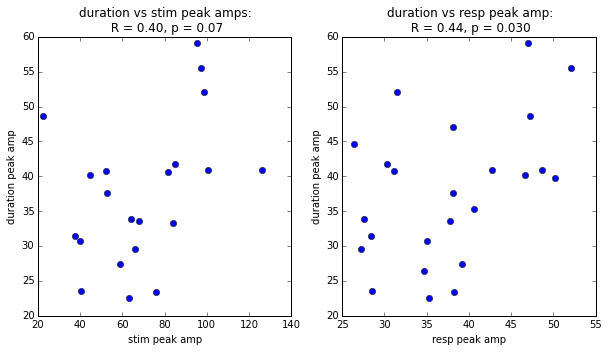

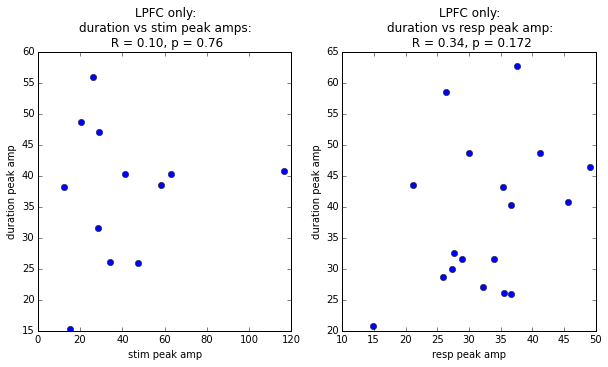

In [25]:
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

#dur vs stim peaks
datasets = pd.merge(df[df.pattern == 'D'][['subj','task']], df[(df.pattern == 'S') | (df.pattern == 'SR')][['subj','task']]).drop_duplicates()
df = pd.merge(datasets, df) #keep only datasets that have both dur and resp elecs

dur_pk = df[df.pattern == 'D'].groupby(['subj','task'])['maxes'].mean()
stim_pk = df[(df.pattern == 'S')|(df.pattern == 'SR')].groupby(['subj','task'])['maxes'].mean()

print 'correlation between stim and duration peak amplitude: %.2f, p = %.3f' %(stats.pearsonr(dur_pk, stim_pk))

f, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(stim_pk, dur_pk, 'o')
ax[0].set_title('duration vs stim peak amps:\n R = %.2f, p = %.2f' %(stats.pearsonr(dur_pk, stim_pk)))
ax[0].set_xlabel('stim peak amp')
ax[0].set_ylabel('duration peak amp')

#dur vs resp peaks
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

datasets = pd.merge(df[df.pattern == 'D'][['subj','task']], df[df.pattern == 'R'][['subj','task']]).drop_duplicates()
df = pd.merge(datasets, df) #keep only datasets that have both dur and resp elecs

dur_pk = df[df.pattern == 'D'].groupby(['subj','task'])['maxes'].mean()
resp_pk = df[df.pattern == 'R'].groupby(['subj','task'])['maxes'].mean()

print 'correlation between resp and duration peak amplitude: %.2f, p = %.3f' %(stats.pearsonr(dur_pk, resp_pk))

ax[1].plot(resp_pk, dur_pk,'o')
ax[1].set_title('duration vs resp peak amp:\n R = %.2f, p = %.3f' %(stats.pearsonr(dur_pk, resp_pk)))
ax[1].set_xlabel('resp peak amp')
ax[1].set_ylabel('duration peak amp')

filename = os.path.join(savedir, 'maxes_vs_duration.png')
plt.savefig(filename)


#LPFC ONLY
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

#dur vs stim peaks
datasets = pd.merge(df[(df.pattern == 'D') & (df.ROI.isin(LPFC))][['subj','task']], df[((df.pattern == 'S') | (df.pattern == 'SR')) & (df.ROI.isin(LPFC))][['subj','task']]).drop_duplicates()
df = pd.merge(datasets, df) #keep only datasets that have both dur and resp elecs

dur_pk = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['maxes'].mean()
stim_pk = df[((df.pattern == 'S')|(df.pattern == 'SR')) & (df.ROI.isin(LPFC))].groupby(['subj','task'])['maxes'].mean()

print 'LPFC only: correlation between stim and duration peak amplitude: %.2f, p = %.3f' %(stats.pearsonr(dur_pk, stim_pk))

f, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(stim_pk, dur_pk, 'o')
ax[0].set_title('LPFC only:\nduration vs stim peak amps:\n R = %.2f, p = %.2f' %(stats.pearsonr(dur_pk, stim_pk)))
ax[0].set_xlabel('stim peak amp')
ax[0].set_ylabel('duration peak amp')

#dur vs resp peaks
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

datasets = pd.merge(df[(df.pattern == 'D') & (df.ROI.isin(LPFC))][['subj','task']], df[(df.pattern == 'R') & (df.ROI.isin(LPFC))][['subj','task']]).drop_duplicates()
df = pd.merge(datasets, df) #keep only datasets that have both dur and resp elecs

dur_pk = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['maxes'].mean()
resp_pk = df[(df.pattern == 'R') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['maxes'].mean()

print 'LPFC only: correlation between resp and duration peak amplitude: %.2f, p = %.3f' %(stats.pearsonr(dur_pk, resp_pk))

ax[1].plot(resp_pk, dur_pk,'o')
ax[1].set_title('LPFC only:\nduration vs resp peak amp:\n R = %.2f, p = %.3f' %(stats.pearsonr(dur_pk, resp_pk)))
ax[1].set_xlabel('resp peak amp')
ax[1].set_ylabel('duration peak amp')

filename = os.path.join(savedir, 'maxes_vs_duration_LPFC.png')
plt.savefig(filename)

correlation between resp and duration peak amplitude (resplocked and stimlocked): 0.55, p = 0.002


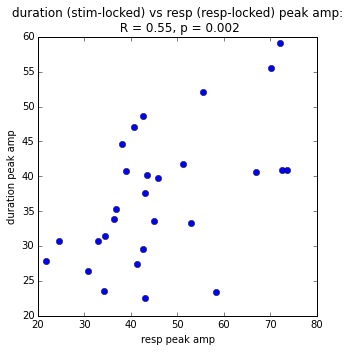

In [70]:
#dur vs resp peaks - stim and response locked respectively
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df_resp = pd.read_csv(filename)
df_resp = df_resp.query("subj not in ['GP27', 'ST28', 'GP44']")

datasets = pd.merge(df[df.pattern == 'D'][['subj','task']], df_resp[['subj','task']]).drop_duplicates()
df = pd.merge(datasets, df) #keep only datasets that have both dur and resp elecs

dur_pk = df[df.pattern == 'D'].groupby(['subj','task'])['maxes'].mean()
resp_pk = df_resp.groupby(['subj','task'])['maxes'].mean()

tmp = dur_pk - resp_pk #drop datasets that don't have both dur and resp
idx = tmp[np.isnan(tmp)].index
resp_pk = resp_pk.drop(idx)

print 'correlation between resp and duration peak amplitude (resplocked and stimlocked): %.2f, p = %.3f' %(stats.pearsonr(dur_pk, resp_pk))

f, ax = plt.subplots(figsize = (5,5))
ax.plot(resp_pk, dur_pk,'o')
ax.set_title('duration (stim-locked) vs resp (resp-locked) peak amp:\n R = %.2f, p = %.3f' %(stats.pearsonr(dur_pk, resp_pk)))
ax.set_xlabel('resp peak amp')
ax.set_ylabel('duration peak amp')

filename = os.path.join(savedir, 'maxes_vs_duration_resplocked.png')
plt.savefig(filename)

#LPFC only 
dur_pk = df[(df.pattern == 'D')].groupby(['subj','task'])['maxes'].mean()
resp_pk = df_resp.groupby(['subj','task'])['maxes'].mean()

tmp = dur_pk - resp_pk #drop datasets that don't have both dur and resp
idx = tmp[np.isnan(tmp)].index
resp_pk = resp_pk.drop(idx)

print 'correlation between resp and duration peak amplitude (resplocked and stimlocked): %.2f, p = %.3f' %(stats.pearsonr(dur_pk, resp_pk))

f, ax = plt.subplots(figsize = (5,5))
ax.plot(resp_pk, dur_pk,'o')
ax.set_title('duration (stim-locked) vs resp (resp-locked) peak amp:\n R = %.2f, p = %.3f' %(stats.pearsonr(dur_pk, resp_pk)))
ax.set_xlabel('resp peak amp')
ax.set_ylabel('duration peak amp')

filename = os.path.join(savedir, 'maxes_vs_duration_resplocked_LPFC.png')
plt.savefig(filename)


In [353]:
### Onset of duration - onset of stimulus/stimulus-response/response vs RT

correlation between RT and lag between duration and resp onsets: 0.59, p = 0.003


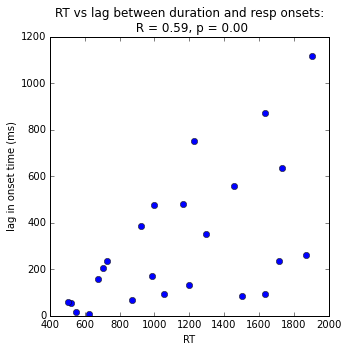

In [22]:

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

#adjust onset times for my task (so from stim, not cue)
idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500

#drop response electrodes with no stimulus locked onsets (15)
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

datasets = pd.merge(df[df.pattern == 'D'][['subj','task']], df[(df.pattern == 'R')][['subj','task']]).drop_duplicates()
df = pd.merge(datasets, df) #keep only datasets that have both dur and resp elecs

rts = df.groupby(['subj','task']).RTs_median.mean()

dur_onset = df[df.pattern == 'D'].groupby(['subj','task'])['start_idx'].mean()
resp_onset = df[(df.pattern == 'R')].groupby(['subj','task'])['start_idx'].mean()

print 'correlation between RT and lag between duration and resp onsets: %.2f, p = %.3f' %(stats.pearsonr(resp_onset-dur_onset, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, resp_onset- dur_onset,'o')
ax.set_title('RT vs lag between duration and resp onsets:\n R = %.2f, p = %.2f' %(stats.pearsonr(resp_onset - dur_onset, rts)))
ax.set_ylabel('lag in onset time (ms)')
ax.set_xlabel('RT')

filename = os.path.join(savedir, 'RT_vs_duronset-responset.png')
plt.savefig(filename)

correlation between RT and lag between duration and SR onsets: 0.83, p = 0.000


"\n#LPFC ONLY\ndur_onset = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['start_idx'].mean()\nstim_onset = df[((df.pattern == 'S')|(df.pattern == 'SR')) & (df.ROI.isin(LPFC))].groupby(['subj','task'])['start_idx'].mean()\nrts = df[df.ROI.isin(LPFC)].groupby(['subj','task']).RTs_median.mean()\n\n#drop datasets that don't have both D and S in LPFC\ndur_stim = dur_onset-stim_onset\ndur_stim = dur_stim.reset_index()\nidx = np.isnan(dur_stim.start_idx).tolist()\nidx = dur_stim.loc[idx].index\ndur_stim = dur_stim.drop(idx).start_idx\nrts = rts.reset_index()\nrts = rts.drop(idx).RTs_median\n\nprint 'LPFC only: correlation between RT and difference between onset of duration and onset of stim: %.2f, p = %.3f' %(stats.pearsonr(dur_stim, rts))\n\nf, ax = plt.subplots(figsize = (5,5))\nplot(rts, dur_stim,'o')\nax.set_title('LPFC only:\nRT vs (onset of dur - S/SR):\n R = %.2f, p = %.2f' %(stats.pearsonr(dur_stim, rts)))\nax.set_ylabel('diff in onset time (ms)')\nax.set_xlab

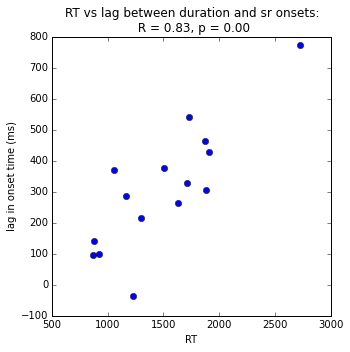

In [50]:
## S-R
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

#adjust onset times for my task (so from stim, not cue)
idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500

#drop response electrodes with no stimulus locked onsets (15)
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

datasets = pd.merge(df[df.pattern == 'D'][['subj','task']], df[(df.pattern == 'SR')][['subj','task']]).drop_duplicates()
df = pd.merge(datasets, df) #keep only datasets that have both dur and resp elecs

rts = df.groupby(['subj','task']).RTs_median.mean()

dur_onset = df[df.pattern == 'D'].groupby(['subj','task'])['start_idx'].mean()
sr_onset = df[(df.pattern == 'SR')].groupby(['subj','task'])['start_idx'].mean()

print 'correlation between RT and lag between duration and SR onsets: %.2f, p = %.3f' %(stats.pearsonr(dur_onset-sr_onset, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, dur_onset - sr_onset,'o')
ax.set_title('RT vs lag between duration and sr onsets:\n R = %.2f, p = %.2f' %(stats.pearsonr(dur_onset - sr_onset, rts)))
ax.set_ylabel('lag in onset time (ms)')
ax.set_xlabel('RT')

filename = os.path.join(savedir, 'RT_vs_duronset-sronset.png')
plt.savefig(filename)


'''
#LPFC ONLY
dur_onset = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['start_idx'].mean()
stim_onset = df[((df.pattern == 'S')|(df.pattern == 'SR')) & (df.ROI.isin(LPFC))].groupby(['subj','task'])['start_idx'].mean()
rts = df[df.ROI.isin(LPFC)].groupby(['subj','task']).RTs_median.mean()

#drop datasets that don't have both D and S in LPFC
dur_stim = dur_onset-stim_onset
dur_stim = dur_stim.reset_index()
idx = np.isnan(dur_stim.start_idx).tolist()
idx = dur_stim.loc[idx].index
dur_stim = dur_stim.drop(idx).start_idx
rts = rts.reset_index()
rts = rts.drop(idx).RTs_median

print 'LPFC only: correlation between RT and difference between onset of duration and onset of stim: %.2f, p = %.3f' %(stats.pearsonr(dur_stim, rts))

f, ax = plt.subplots(figsize = (5,5))
plot(rts, dur_stim,'o')
ax.set_title('LPFC only:\nRT vs (onset of dur - S/SR):\n R = %.2f, p = %.2f' %(stats.pearsonr(dur_stim, rts)))
ax.set_ylabel('diff in onset time (ms)')
ax.set_xlabel('RT')

filename = os.path.join(savedir, 'RT_vs_duronset-stimonset_LPFC.png')
plt.savefig(filename)
'''

In [27]:
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600

idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500


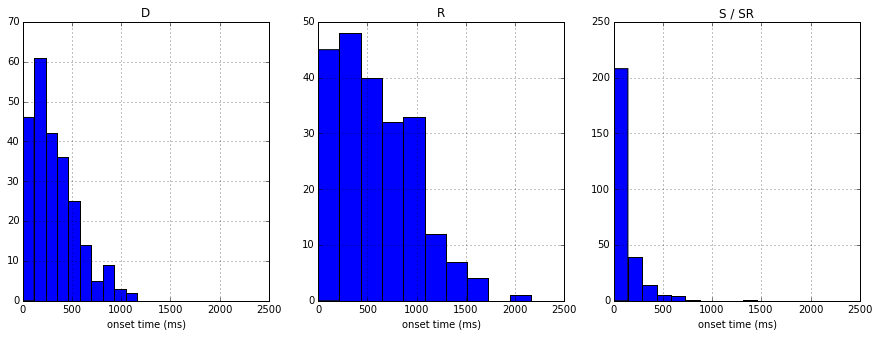

In [28]:
f, ax = plt.subplots(1,3, figsize = (15,5))
df[df.pattern == 'D'].start_idx.hist(ax = ax[0])
df[df.pattern == 'R'].start_idx.hist(ax = ax[1])
df[(df.pattern == 'S') | (df.pattern == 'SR')].start_idx.hist(ax = ax[2])
etype = ['D','R','S / SR']
for i, a in enumerate(ax):
    a.set_title(etype[i])
    a.set_xlabel('onset time (ms)')
    a.set_xlim([0, 2500])

filename = os.path.join(savedir, 'HGonset_histograms.png')
plt.savefig(filename)

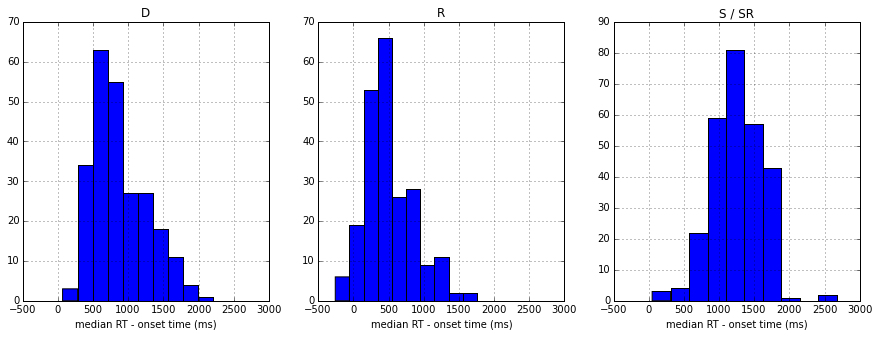

In [29]:
f, ax = plt.subplots(1,3, figsize = (15,5))


(df[df.pattern == 'D'].RTs_median - df[df.pattern == 'D'].start_idx).hist(ax = ax[0])
(df[df.pattern == 'R'].RTs_median - df[df.pattern == 'R'].start_idx).hist(ax = ax[1])
(df[(df.pattern == 'S') | (df.pattern == 'SR')].RTs_median - df[(df.pattern == 'S') | (df.pattern == 'SR')].start_idx).hist(ax = ax[2])

etype = ['D','R','S / SR']
for i, a in enumerate(ax):
    a.set_title(etype[i])
    a.set_xlabel('median RT - onset time (ms)')
    a.set_xlim([-500, 3000])    
    
filename = os.path.join(savedir, 'RT-HGonset_histograms.png')
plt.savefig(filename)

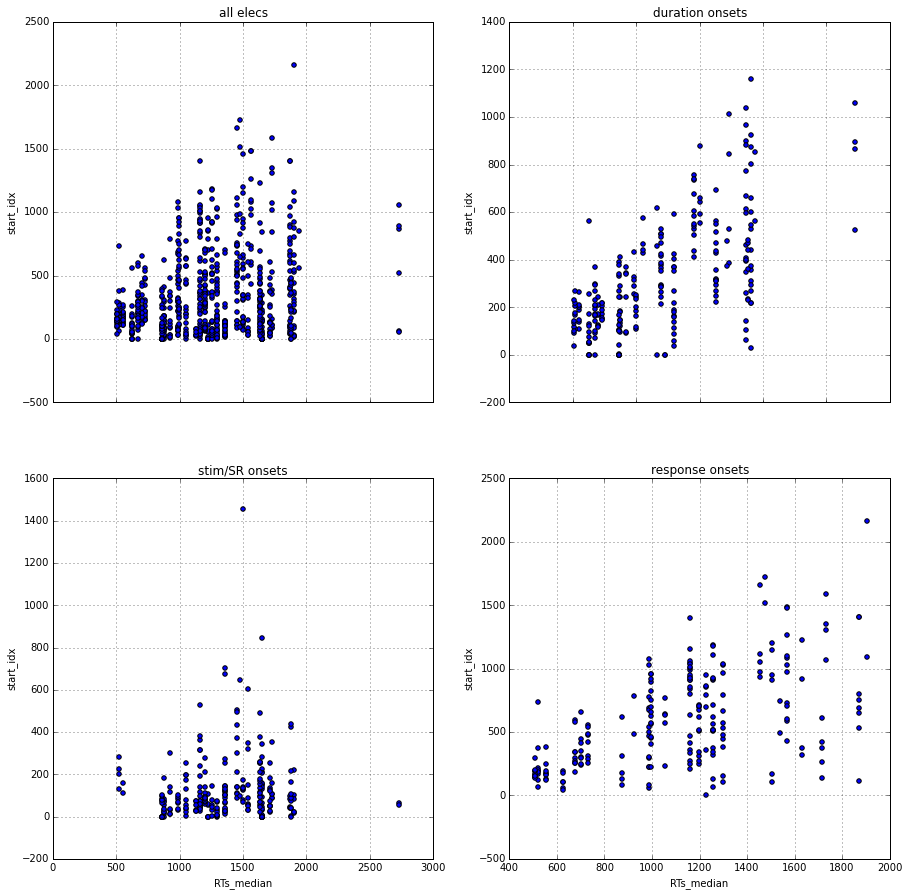

In [30]:
#HG onset vs RTs per task
#df.groupby(['subj','task']).plot(x = 'RTs_median', y = 'lats', kind = 'scatter')

f, ax = plt.subplots(2,2, figsize = (15,15))
ax = ax.flatten()
df.plot(x = 'RTs_median', y = 'start_idx', kind = 'scatter', title = 'all elecs', ax = ax[0])
df[df.pattern == 'D'].plot(x = 'RTs_median', y = 'start_idx', kind = 'scatter', title = 'duration onsets', ax = ax[1])
df[(df.pattern == 'S') | (df.pattern == 'SR')].plot(x = 'RTs_median', y = 'start_idx', kind = 'scatter', title = 'stim/SR onsets', ax = ax[2])
df[df.pattern == 'R'].plot(x = 'RTs_median', y = 'start_idx', kind = 'scatter', title = 'response onsets', ax = ax[3])

filename = os.path.join(savedir, 'HGonsets_bydataset.png')
plt.savefig(filename)

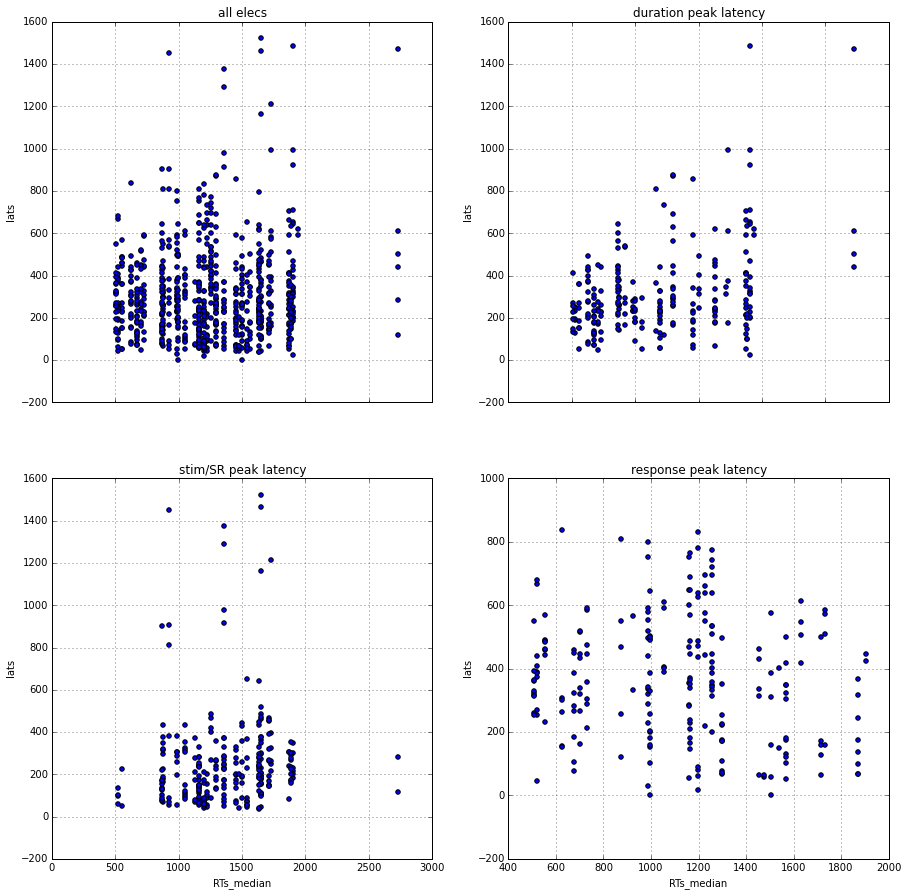

In [31]:
#peak latency vs RTs per task

f, ax = plt.subplots(2,2, figsize = (15,15))
ax = ax.flatten()
df.plot(x = 'RTs_median', y = 'lats', kind = 'scatter', title = 'all elecs', ax = ax[0])
df[df.pattern == 'D'].plot(x = 'RTs_median', y = 'lats', kind = 'scatter', title = 'duration peak latency', ax = ax[1])
df[(df.pattern == 'S') | (df.pattern == 'SR')].plot(x = 'RTs_median', y = 'lats', kind = 'scatter', title = 'stim/SR peak latency', ax = ax[2])
df[df.pattern == 'R'].plot(x = 'RTs_median', y = 'lats', kind = 'scatter', title = 'response peak latency', ax = ax[3])

filename = os.path.join(savedir, 'lats_bydataset.png')
plt.savefig(filename)

In [609]:
savedir

'/home/knight/matar/MATLAB/DATA/Avgusta/PCA/ShadePlots_hclust/elecs/significance_windows/smoothed/mean_traces/images/correlations'

/home/knight/matar/MATLAB/DATA/Avgusta/PCA/ShadePlots_hclust/elecs/significance_windows/smoothed/mean_traces/images/correlations


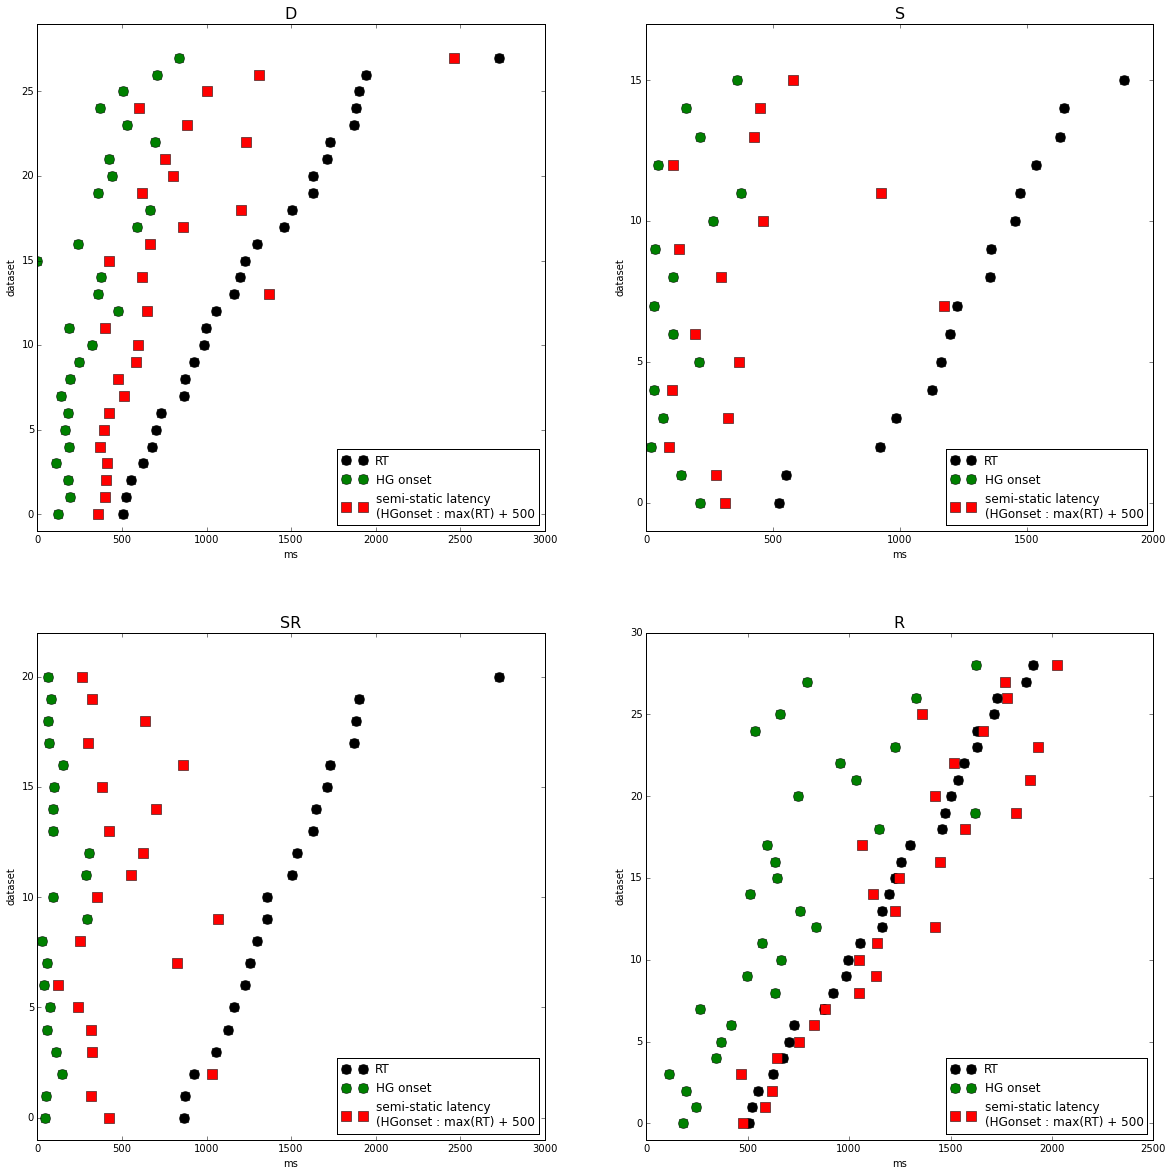

In [8]:
#'single trial' plot for all datasets for each type of elec
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

df = df.query("subj not in ['GP27', 'ST28', 'GP44']")
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500

elec_types = ['D','S','SR','R']


f, ax = plt.subplots(2,2, figsize = (20,20))
ax = ax.flatten()
for i, pattern in enumerate(elec_types):
    df_sorted = df[df.pattern == pattern].groupby(['subj','task'])[['RTs_median','start_idx','lats_semi_static']].mean().sort('RTs_median') 
    df_sorted['lats_semi_static_adjusted'] = df_sorted.lats_semi_static + df_sorted.start_idx
    num_datasets = df_sorted.shape[0]

    ax[i].plot(df_sorted.RTs_median, np.arange(num_datasets), marker = 'o', color = 'k', lw = 0, markersize = 10, label = 'RT')
    ax[i].plot(df_sorted.start_idx, np.arange(num_datasets), marker = 'o',color = 'g', lw = 0, markersize = 10, label = 'HG onset')
    ax[i].plot(df_sorted.lats_semi_static_adjusted,np.arange(num_datasets), marker = 's',color = 'r', lw = 0, markersize = 10, label = 'semi-static latency\n(HGonset : max(RT) + 500')
    ax[i].set_title('%s' %(pattern), fontsize = 16)
    ax[i].set_xlabel('ms')
    ax[i].set_ylabel('dataset')
    ax[i].set_ylim([-1, num_datasets+1])
    ax[i].legend(loc = 'best')
    


filename = os.path.join(savedir, 'onsets_and_semi_static_latencies_alltypes.png')
plt.savefig(filename)

print savedir
#df_sorted.to_csv(os.path.join(savedir, 'df_sorted_grouped_values_allpatterns.csv'))
#from matplotlib.font_manager import FontProperties
#fontP = FontProperties()
#fontP.set_size('medium')
#ax.legend(prop = fontP, loc = 'best')


/home/knight/matar/MATLAB/DATA/Avgusta/PCA/ShadePlots_hclust/elecs/significance_windows/smoothed/mean_traces/images/correlations


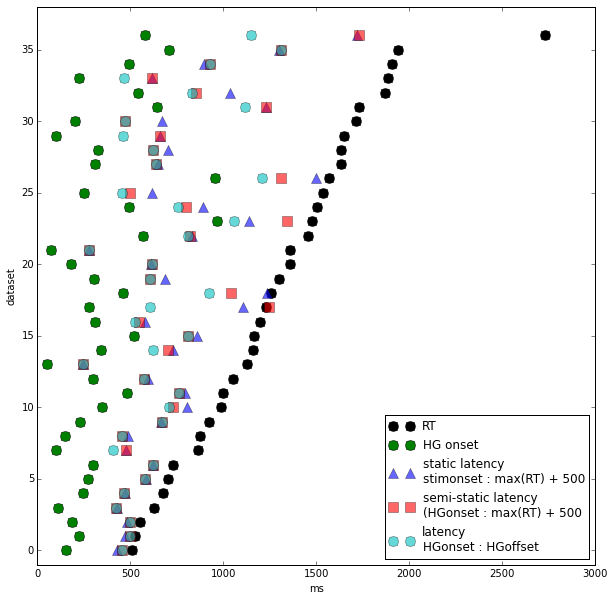

In [348]:
#'single trial' plot for all datasets for 1 type of elec

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

df = df.query("subj not in ['GP27', 'ST28', 'GP44'] and pattern == 'S'")
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500


df_sorted = df.groupby(['subj','task'])[['RTs_median','start_idx','lats_static', 'lats_semi_static', 'lats']].mean().sort('RTs_median') 
df_sorted['lats_static_adj'] = df_sorted.lats_static
df_sorted['lats_semi_static_adj'] = df_sorted.lats_semi_static + df_sorted.start_idx
df_sorted['lats_adj'] = df_sorted.lats + df_sorted.start_idx

num_datasets = df_sorted.shape[0]

f, ax = plt.subplots(figsize = (10,10))
ax.plot(df_sorted.RTs_median, np.arange(num_datasets), marker = 'o', color = 'k', lw = 0, markersize = 10, label = 'RT')
ax.plot(df_sorted.start_idx, np.arange(num_datasets), marker = 'o',color = 'g', lw = 0, markersize = 10, label = 'HG onset')
ax.plot(df_sorted.lats_static_adj,np.arange(num_datasets), marker = '^',color = 'b', lw = 0, markersize = 10, alpha = 0.6, label = 'static latency\nstimonset : max(RT) + 500')
ax.plot(df_sorted.lats_semi_static_adj,np.arange(num_datasets), marker = 's',color = 'r', lw = 0, markersize = 10,alpha = 0.6, label = 'semi-static latency\n(HGonset : max(RT) + 500')
ax.plot(df_sorted.lats_adj,np.arange(num_datasets), marker = 'o',color = 'c', lw = 0, markersize = 10, alpha = 0.6,label = 'latency\nHGonset : HGoffset')

ax.set_xlabel('ms')
ax.set_ylabel('dataset')
ax.set_ylim([-1, num_datasets+1])
ax.legend(loc = 'best')

filename = os.path.join(savedir, 'onsets_and_latencies_bydataset_stimonly.png')
plt.savefig(filename)

print savedir
df_sorted.to_csv(os.path.join(savedir, 'df_sorted_grouped_values_allpatterns.csv'))
#from matplotlib.font_manager import FontProperties
#fontP = FontProperties()
#fontP.set_size('medium')
#ax.legend(prop = fontP, loc = 'best')


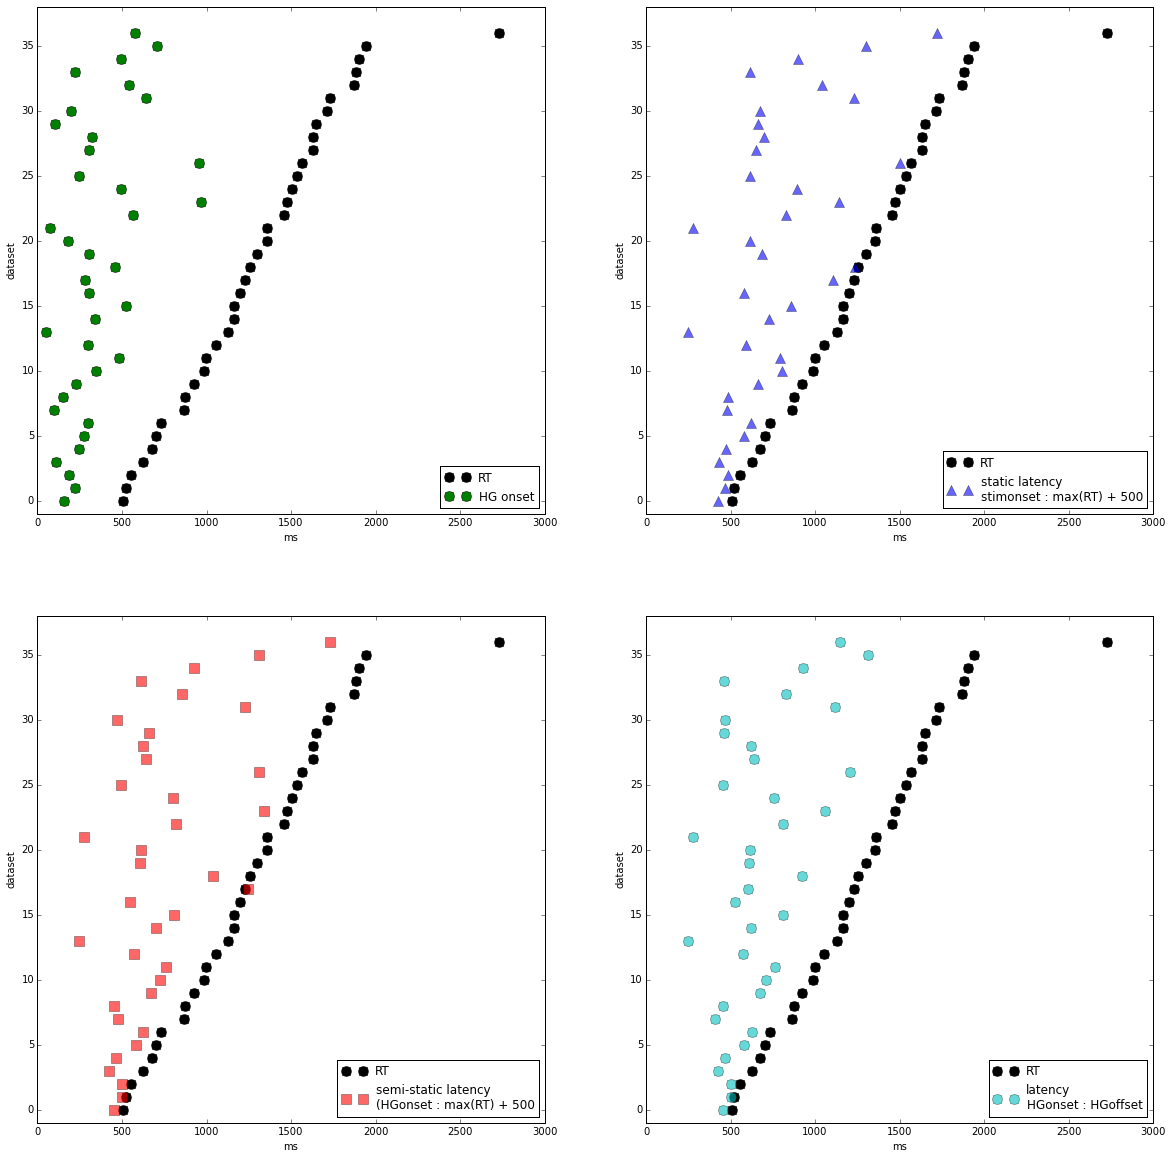

In [347]:
#'single trial' plot for all types of elecs for 1 metric

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)

df = df.query("subj not in ['GP27', 'ST28', 'GP44']")
idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)

idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500


df_sorted = df.groupby(['subj','task'])[['RTs_median','start_idx','lats_static', 'lats_semi_static', 'lats']].mean().sort('RTs_median') 
df_sorted['lats_static_adj'] = df_sorted.lats_static
df_sorted['lats_semi_static_adj'] = df_sorted.lats_semi_static + df_sorted.start_idx
df_sorted['lats_adj'] = df_sorted.lats + df_sorted.start_idx

num_datasets = df_sorted.shape[0]

f, ax = plt.subplots(2,2, figsize = (20,20))
ax = ax.flatten()
for i in range(4):
    ax[i].plot(df_sorted.RTs_median, np.arange(num_datasets), marker = 'o', color = 'k', lw = 0, markersize = 10, label = 'RT')
    ax[i].set_xlabel('ms')
    ax[i].set_ylabel('dataset')
    ax[i].set_ylim([-1, num_datasets+1])

ax[0].plot(df_sorted.start_idx, np.arange(num_datasets), marker = 'o',color = 'g', lw = 0, markersize = 10, label = 'HG onset')
ax[1].plot(df_sorted.lats_static_adj,np.arange(num_datasets), marker = '^',color = 'b', lw = 0, markersize = 10, alpha = 0.6, label = 'static latency\nstimonset : max(RT) + 500')
ax[2].plot(df_sorted.lats_semi_static_adj,np.arange(num_datasets), marker = 's',color = 'r', lw = 0, markersize = 10,alpha = 0.6, label = 'semi-static latency\n(HGonset : max(RT) + 500')
ax[3].plot(df_sorted.lats_adj,np.arange(num_datasets), marker = 'o',color = 'c', lw = 0, markersize = 10, alpha = 0.6,label = 'latency\nHGonset : HGoffset')

for i in range(4):
    ax[i].legend(loc = 'best')

filename = os.path.join(savedir, 'onsets_and_latencies_allpatterns_bymetric.png')
plt.savefig(filename)

#from matplotlib.font_manager import FontProperties
#fontP = FontProperties()
#fontP.set_size('medium')
#ax.legend(prop = fontP, loc = 'best')


correlation between HG onset and median RT for:
D R=0.82 p=0.000
R R=0.73 p=0.000
S R=0.35 p=0.179
SR R=0.02 p=0.928
LPFC only: correlation between HG onset and median RT for:
D R=0.85 p=0.000
R R=0.63 p=0.002
S R=0.45 p=0.267
SR R=0.02 p=0.950


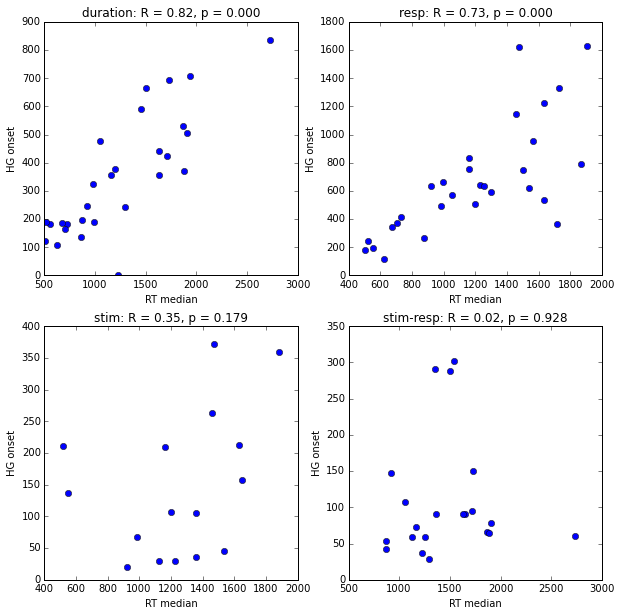

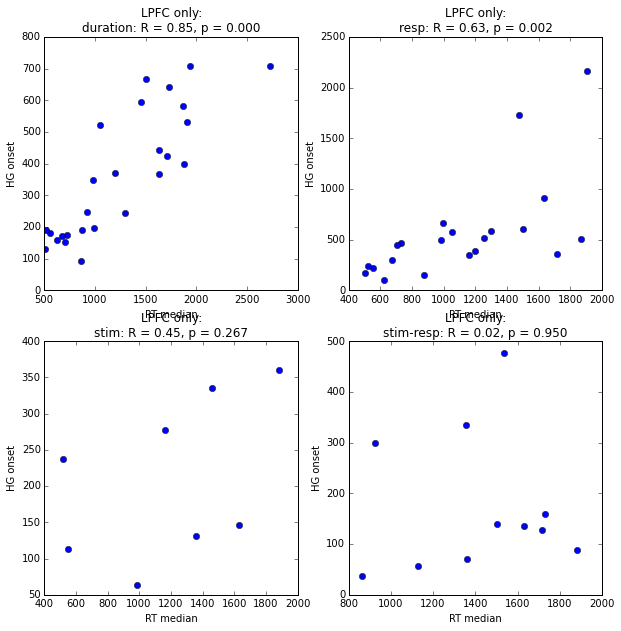

In [183]:
#HG onset vs RT
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
#adjust onset times for my task (so from stim, not cue)
idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500

df_group_D = df[df.pattern == 'D'].groupby(['subj','task'])
rD, pD = stats.pearsonr(df_group_D.start_idx.mean(), df_group_D.RTs_median.mean())

df_group_R = df[df.pattern == 'R'].groupby(['subj','task'])
rR, pR = stats.pearsonr(df_group_R.start_idx.mean(), df_group_R.RTs_median.mean())

df_group_S = df[df.pattern == 'S'].groupby(['subj','task'])
rS, pS = stats.pearsonr(df_group_S.start_idx.mean(), df_group_S.RTs_median.mean())

df_group_SR = df[df.pattern == 'SR'].groupby(['subj','task'])
rSR, pSR = stats.pearsonr(df_group_SR.start_idx.mean(), df_group_SR.RTs_median.mean())

print 'correlation between HG onset and median RT for:\nD R=%.2f p=%.3f\nR R=%.2f p=%.3f\nS R=%.2f p=%.3f\nSR R=%.2f p=%.3f' %(rD, pD, rR, pR, rS, pS, rSR, pSR)

data_dict = {'stim': (df_group_S.start_idx.mean(), df_group_S.RTs_median.mean()), 'duration': (df_group_D.start_idx.mean(), df_group_D.RTs_median.mean()), 'stim-resp': (df_group_SR.start_idx.mean(), df_group_SR.RTs_median.mean()), 'resp': (df_group_R.start_idx.mean(), df_group_R.RTs_median.mean())}

f, ax = plt.subplots(2,2, figsize = (10,10))
ax = ax.flatten()
for i, f in enumerate(data_dict.keys()):
    ax[i].plot(data_dict[f][1], data_dict[f][0],'o')
    r, p = stats.pearsonr(data_dict[f][1], data_dict[f][0])
    ax[i].set_title('%s: R = %.2f, p = %.3f' %(f, r, p))
    ax[i].set_xlabel('RT median')
    ax[i].set_ylabel('HG onset')

filename = os.path.join(savedir, 'RT_vs_HGonsets_alltypes.png')
plt.savefig(filename)

#LPFC only
df_group_D = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])
rD, pD = stats.pearsonr(df_group_D.start_idx.mean(), df_group_D.RTs_median.mean())

df_group_R = df[(df.pattern == 'R') & (df.ROI.isin(LPFC))].groupby(['subj','task'])
rR, pR = stats.pearsonr(df_group_R.start_idx.mean(), df_group_R.RTs_median.mean())

df_group_S = df[(df.pattern == 'S')  & (df.ROI.isin(LPFC))].groupby(['subj','task'])
rS, pS = stats.pearsonr(df_group_S.start_idx.mean(), df_group_S.RTs_median.mean())

df_group_SR = df[(df.pattern == 'SR') & (df.ROI.isin(LPFC))].groupby(['subj','task'])
rSR, pSR = stats.pearsonr(df_group_SR.start_idx.mean(), df_group_SR.RTs_median.mean())

print 'LPFC only: correlation between HG onset and median RT for:\nD R=%.2f p=%.3f\nR R=%.2f p=%.3f\nS R=%.2f p=%.3f\nSR R=%.2f p=%.3f' %(rD, pD, rR, pR, rS, pS, rSR, pSR)

data_dict = {'stim': (df_group_S.start_idx.mean(), df_group_S.RTs_median.mean()), 'duration': (df_group_D.start_idx.mean(), df_group_D.RTs_median.mean()), 'stim-resp': (df_group_SR.start_idx.mean(), df_group_SR.RTs_median.mean()), 'resp': (df_group_R.start_idx.mean(), df_group_R.RTs_median.mean())}

f, ax = plt.subplots(2,2, figsize = (10,10))
ax = ax.flatten()
for i, f in enumerate(data_dict.keys()):
    ax[i].plot(data_dict[f][1], data_dict[f][0],'o')
    r, p = stats.pearsonr(data_dict[f][1], data_dict[f][0])
    ax[i].set_title('LPFC only:\n%s: R = %.2f, p = %.3f' %(f, r, p))
    ax[i].set_xlabel('RT median')
    ax[i].set_ylabel('HG onset')

filename = os.path.join(savedir, 'RT_vs_HGonsets_alltypes_LPFC.png')
plt.savefig(filename)

correlation between min-max HG onset and median RT for:
D R=0.46 p=0.014
R R=0.38 p=0.040
S R=0.38 p=0.145
SR R=-0.01 p=0.983


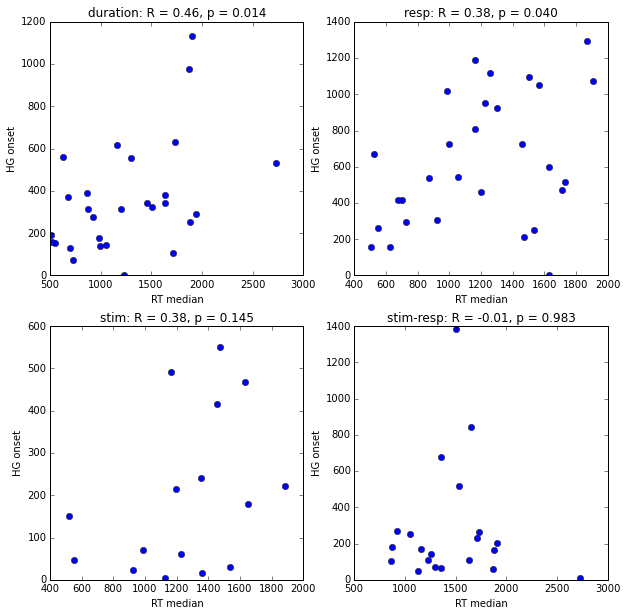

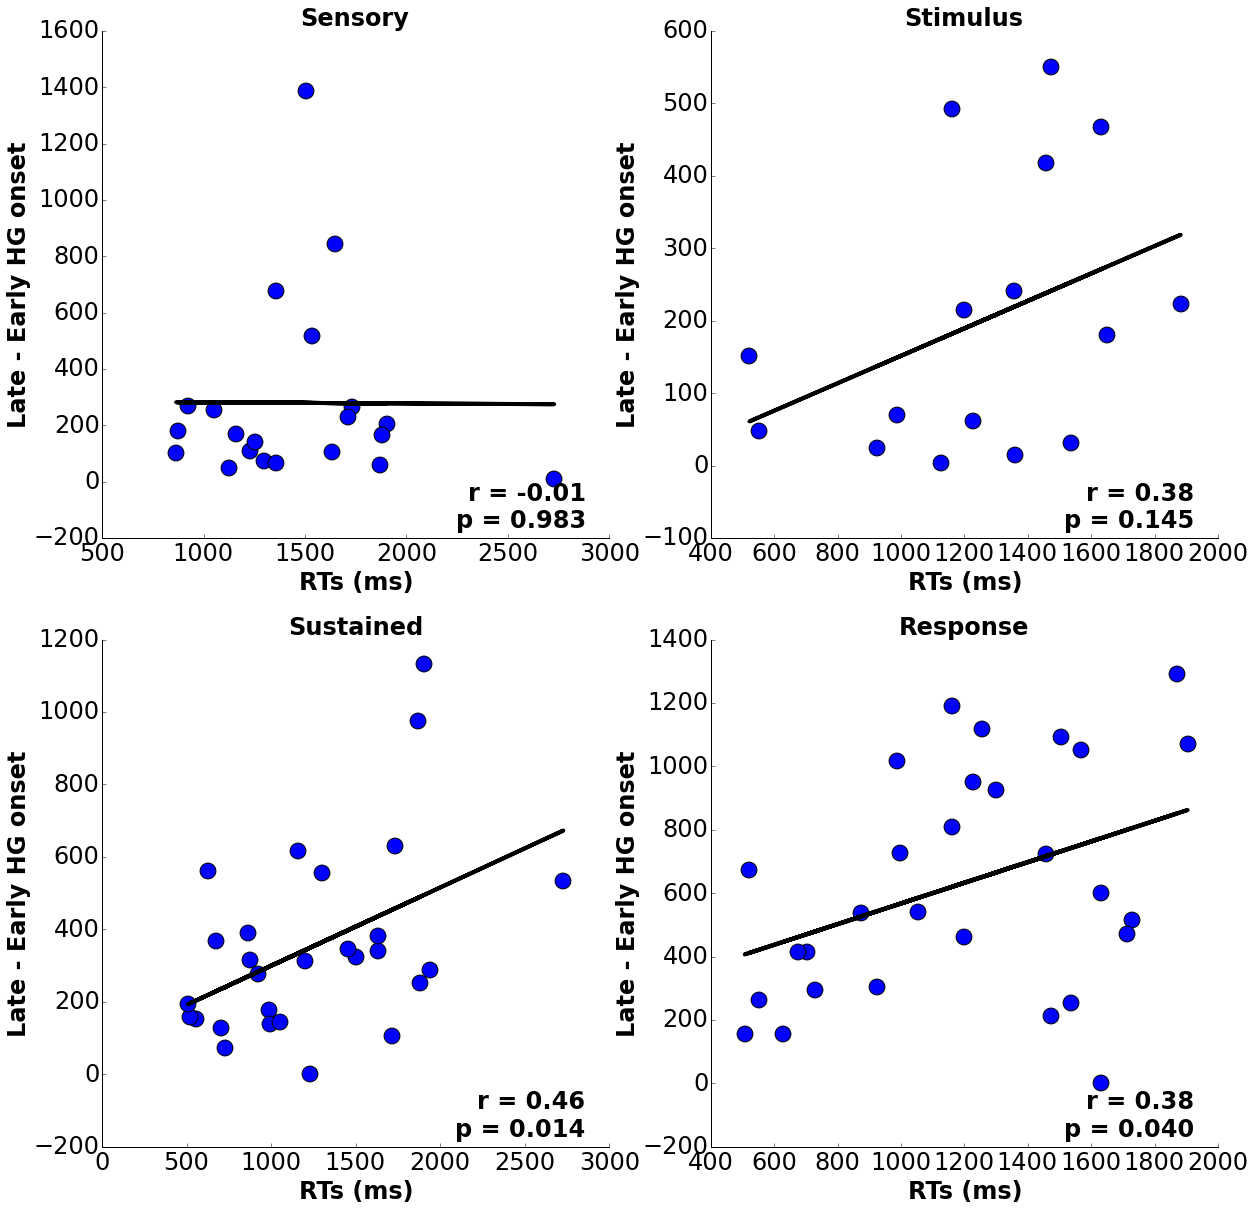

In [10]:
#corr of minimum - maximum onset and RT
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
#adjust onset times for my task (so from stim, not cue)
idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500

df_group_D = df[df.pattern == 'D'].groupby(['subj','task'])
rD, pD = stats.pearsonr(df_group_D.start_idx.max() - df_group_D.start_idx.min(), df_group_D.RTs_median.mean())

df_group_R = df[df.pattern == 'R'].groupby(['subj','task'])
rR, pR = stats.pearsonr(df_group_R.start_idx.max() - df_group_R.start_idx.min(), df_group_R.RTs_median.mean())

df_group_S = df[df.pattern == 'S'].groupby(['subj','task'])
rS, pS = stats.pearsonr(df_group_S.start_idx.max() - df_group_S.start_idx.min(), df_group_S.RTs_median.mean())

df_group_SR = df[df.pattern == 'SR'].groupby(['subj','task'])
rSR, pSR = stats.pearsonr(df_group_SR.start_idx.max() - df_group_SR.start_idx.min(), df_group_SR.RTs_median.mean())

print 'correlation between min-max HG onset and median RT for:\nD R=%.2f p=%.3f\nR R=%.2f p=%.3f\nS R=%.2f p=%.3f\nSR R=%.2f p=%.3f' %(rD, pD, rR, pR, rS, pS, rSR, pSR)

data_dict = {'stim': (df_group_S.start_idx.max() - df_group_S.start_idx.min(), df_group_S.RTs_median.mean()), 'duration': (df_group_D.start_idx.max() - df_group_D.start_idx.min(), df_group_D.RTs_median.mean()), 'stim-resp': (df_group_SR.start_idx.max() - df_group_SR.start_idx.min(), df_group_SR.RTs_median.mean()), 'resp': (df_group_R.start_idx.max() - df_group_R.start_idx.min(), df_group_R.RTs_median.mean())}

f, ax = plt.subplots(2,2, figsize = (10,10))
ax = ax.flatten()
for i, f in enumerate(data_dict.keys()):
    ax[i].plot(data_dict[f][1], data_dict[f][0],'o')
    r, p = stats.pearsonr(data_dict[f][1], data_dict[f][0])
    ax[i].set_title('%s: R = %.2f, p = %.3f' %(f, r, p))
    ax[i].set_xlabel('RT median')
    ax[i].set_ylabel('HG onset')

filename = os.path.join(savedir, 'RT_vs_HGonsets_alltypes_min-max.png')
plt.savefig(filename)

## plot nice for duration and resp only
fig, ax = plt.subplots(2,2, figsize = (20,20))
ax = ax.flatten()
for i,f in enumerate(['stim-resp', 'stim', 'duration', 'resp']):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize = 24)
    ax[i].yaxis.set_tick_params(labelsize = 24)
    ax[i].set_xlabel('RTs (ms)',weight = 'bold', fontsize = 24)
    ax[i].set_ylabel('Late - Early HG onset',weight = 'bold', fontsize = 24)
    
    ax[i].scatter(data_dict[f][1], data_dict[f][0],marker = 'o', s=250)
    R, p = stats.pearsonr(data_dict[f][1], data_dict[f][0])
    A = np.vstack([data_dict[f][1],np.ones(len(data_dict[f][1]))]).T
    m,c = np.linalg.lstsq(A,np.array(data_dict[f][0]))[0]
    ax[i].plot(data_dict[f][1],data_dict[f][1]*m+c, color = 'k', linewidth = 4, label = 'r = %.2f\np = %.3f' %(R, p)) 
    ax[i].text(0.95, 0.01, 'r = %.2f\np = %.3f' %(R, p), transform = ax[i].transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')
   
ax[0].set_title('Sensory', weight = 'bold', fontsize = 24)
ax[1].set_title('Stimulus', weight = 'bold', fontsize = 24)
ax[2].set_title('Sustained', weight = 'bold', fontsize = 24)
ax[3].set_title('Response', weight = 'bold', fontsize = 24)

filename = os.path.join(savedir, 'RT_vs_HGonsets_alltypes_min-max.png')
plt.savefig(filename)



In [260]:
savedir

'/home/knight/matar/MATLAB/DATA/Avgusta/PCA/ShadePlots_hclust/elecs/significance_windows/smoothed/mean_traces/images/correlations'

In [ ]:
#partial correlation between RT and onset of resp minus stim, with duration onset as a covariate 
#(run this correlation without duration onsets). 

from partial_corr import partial_corr
from scipy.io import savemat

In [33]:
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
#adjust onset times for my task (so from stim, not cue)
idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500


datasets = pd.merge(df[df.pattern == 'D'][['subj','task']], df[(df.pattern == 'S') | (df.pattern == 'SR')][['subj','task']])
datasets = pd.merge(datasets, df[df.pattern == 'R'][['subj','task']]).drop_duplicates()
df = pd.merge(datasets, df) #keep only datasets that have dur and resp and stim elecs

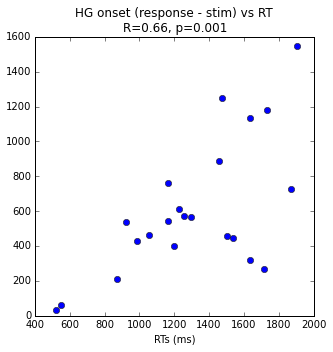

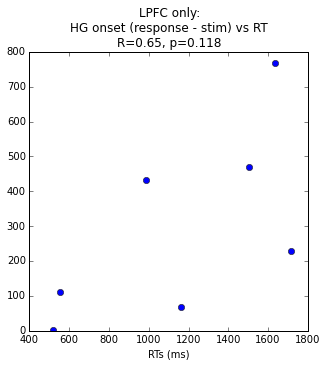

In [36]:
#RT versus difference betwen response and stim onset
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
df = df.query("subj not in ['GP27', 'ST28', 'GP44']")

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
#adjust onset times for my task (so from stim, not cue)
idx = df.task.isin(['DecisionAud'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 600
idx = df.task.isin(['DecisionVis'])
df.loc[idx,'start_idx'] = df.loc[idx].start_idx - 500

rts = df.groupby(['subj','task']).RTs_median.mean()
dur_onset = df[df.pattern == 'D'].groupby(['subj','task'])['start_idx'].mean()
resp_onset = df[df.pattern == 'R'].groupby(['subj','task'])['start_idx'].mean()
stim_onset = df[(df.pattern == 'S')|(df.pattern == 'SR')].groupby(['subj','task'])['start_idx'].mean()

#data_array = np.array([resp_onset - stim_onset, rts, dur_onset]).T

#savemat('/home/knight/matar/tmp.mat', {'data_array':data_array})

y = pd.concat([resp_onset, stim_onset, rts], axis = 1)
y.columns = ['resp_onset','stim_onset','RTs_median']

#drop if doesn't have both stim and resp
idx = y[(np.isnan(y.resp_onset)) | (np.isnan(y.stim_onset))].index
y = y.drop(idx)

f, ax = plt.subplots(figsize=(5,5))
ax.plot(y.RTs_median, y.resp_onset - y.stim_onset, 'o')
ax.set_title('HG onset (response - stim) vs RT\nR=%.2f, p=%.3f' %(stats.pearsonr(y.resp_onset-y.stim_onset, y.RTs_median)))
ax.set_xlabel('RTs (ms)')

filename = os.path.join(savedir, 'RT_vs_resp-stimonset.png')
plt.savefig(filename)

#LPFC ONLY
rts = df.groupby(['subj','task']).RTs_median.mean()
dur_onset = df[(df.pattern == 'D') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['start_idx'].mean()
resp_onset = df[(df.pattern == 'R') & (df.ROI.isin(LPFC))].groupby(['subj','task'])['start_idx'].mean()
stim_onset = df[((df.pattern == 'S')|(df.pattern == 'SR')) & (df.ROI.isin(LPFC))].groupby(['subj','task'])['start_idx'].mean()

y = pd.concat([resp_onset, stim_onset, rts], axis = 1)
y.columns = ['resp_onset','stim_onset','RTs_median']

#drop if doesn't have both stim and resp
idx = y[(np.isnan(y.resp_onset)) | (np.isnan(y.stim_onset))].index
y = y.drop(idx)

f, ax = plt.subplots(figsize=(5,5))
ax.plot(y.RTs_median, y.resp_onset - y.stim_onset, 'o')
ax.set_title('LPFC only:\nHG onset (response - stim) vs RT\nR=%.2f, p=%.3f' %(stats.pearsonr(y.resp_onset-y.stim_onset, y.RTs_median)))
ax.set_xlabel('RTs (ms)')

filename = os.path.join(savedir, 'RT_vs_resp-stimonset_LPFC.png')
plt.savefig(filename)

## overlap vs unique

In [40]:
# calculate electrode overlap between EmoGen & EmoRep/SelfAud 
# mean onset of overlapped electrodes
# mean onset of EmoGen-unique electrodes

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
df = df.query("subj in ['JH2', 'GP35', 'GP15']")

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
df = df[df.pattern == 'D']

EmoGen = df[(df.subj == 'GP15') & (df.task == 'EmoGen')][['elec','start_idx']]
EmoGen = EmoGen.query('elec not in [52, 54, 66, 67]')
EmoRep = df[(df.subj == 'GP15') & (df.task == 'EmoRep')][['elec','start_idx']]

unique_to_Gen = ~(np.in1d(EmoGen.elec, EmoRep.elec))
unique_to_Rep = ~(np.in1d(EmoRep.elec, EmoGen.elec))

overlapped_elecs_Rep = (np.in1d(EmoRep.elec, EmoGen.elec))
overlapped_elecs_Gen = (np.in1d(EmoGen.elec, EmoRep.elec))

#number of overap between Gen and Rep:
num_overlap = len(EmoRep) - sum(unique_to_Gen)

EmoGen_unique = EmoGen[unique_to_Gen].start_idx.mean()
EmoGen_overlap = EmoGen[overlapped_elecs_Gen].start_idx.mean()
EmoRep_unique = EmoRep[unique_to_Rep].start_idx.mean()

#print (EmoGen_unique, EmoGen_overlap, EmoRep.start_idx.mean())

u,p = stats.mannwhitneyu(EmoGen[unique_to_Gen].start_idx, EmoGen[overlapped_elecs_Gen].start_idx)
print ('GP15 EmoGen: EmoGen with and without overlap (EmoRep): %.3f' %(p))


#GP35
EmoGen = df[(df.subj == 'GP35') & (df.task == 'EmoGen')][['elec','start_idx']]
EmoRep = df[(df.subj == 'GP35') & (df.task == 'EmoRep')][['elec','start_idx']]

unique_to_Gen = ~(np.in1d(EmoGen.elec, EmoRep.elec))
unique_to_Rep = ~(np.in1d(EmoRep.elec, EmoGen.elec))

overlapped_elecs_Rep = (np.in1d(EmoRep.elec, EmoGen.elec))
overlapped_elecs_Gen = (np.in1d(EmoGen.elec, EmoRep.elec))

#number of overap between Gen and Rep:
num_overlap = len(EmoRep) - sum(unique_to_Gen)

EmoGen_unique = EmoGen[unique_to_Gen].start_idx.mean()
EmoGen_overlap = EmoGen[overlapped_elecs_Gen].start_idx.mean()
EmoRep_unique = EmoRep[overlapped_elecs_Rep].start_idx.mean()

#print (EmoGen_unique, EmoGen_overlap, EmoRep.start_idx.mean())


u,p = stats.mannwhitneyu(EmoGen[unique_to_Gen].start_idx, EmoGen[overlapped_elecs_Gen].start_idx)
print ('GP35 EmoGen: EmoGen with and without overlap (EmoRep): %.3f' %(p))


#JH2
EmoGen = df[(df.subj == 'JH2') & (df.task == 'EmoGen')][['elec','start_idx']]
SelfAud = df[(df.subj == 'JH2') & (df.task == 'SelfAud')][['elec','start_idx']]

unique_to_Gen = ~(np.in1d(EmoGen.elec, SelfAud.elec))
unique_to_Self = ~(np.in1d(SelfAud.elec, EmoGen.elec))

overlapped_elecs_Self = (np.in1d(SelfAud.elec, EmoGen.elec))
overlapped_elecs_Gen = (np.in1d(EmoGen.elec, SelfAud.elec))

#number of overap between Gen and Rep:
num_overlap = len(SelfAud) - sum(unique_to_Gen)

EmoGen_unique = EmoGen[unique_to_Gen].start_idx.mean()
EmoGen_overlap = EmoGen[overlapped_elecs_Gen].start_idx.mean()
SelfAud_unique = SelfAud[overlapped_elecs_Self].start_idx.mean()

#print (EmoGen_unique, EmoGen_overlap, SelfAud.start_idx.mean())

u,p = stats.mannwhitneyu(EmoGen[unique_to_Gen].start_idx, EmoGen[overlapped_elecs_Gen].start_idx)
print ('JH2 EmoGen: EmoGen with and without overlap (SelfAud): %.3f' %(p))



GP15 EmoGen: EmoGen with and without overlap (EmoRep): 0.019
GP35 EmoGen: EmoGen with and without overlap (EmoRep): 0.029
JH2 EmoGen: EmoGen with and without overlap (SelfAud): 0.023


In [180]:
# calculate electrode overlap between EmoGen & EmoRep/SelfAud 
# mean onset of overlapped electrodes
# mean onset of EmoGen-unique electrodes
alldata_unique = list()
alldata_overlap = list()
datasets = ['GP15_EmoGen_EmoRep','GP35_EmoGen_EmoRep','JH2_EmoGen_SelfAud']
#datasets = ['GP15_FaceEmo_FaceGen', 'GP35_FaceEmo_FaceGen']

filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
df = df.query("subj in ['JH2', 'GP35', 'GP15']")
#df = df.query("subj in ['GP35', 'GP15']")

idx = df[(df.pattern == 'R') & (df.start_idx == 0)].index
df = df.drop(idx)
df = df[df.pattern == 'D']


for j in datasets:
    subj, difftask, easytask = j.split('_')

    difficult = df[(df.subj == subj) & (df.task == difftask)][['elec','start_idx']]
    easy = df[(df.subj == subj) & (df.task == easytask)][['elec','start_idx']]
    
    if subj == 'GP15':
        difficult = difficult.query('elec not in [66, 67, 68]')
        easy = easy.query('elec not in [66, 67, 68]')
    
    unique_to_diff = difficult.elec[~(np.in1d(difficult.elec, easy.elec))] #elecs that only in difficult
    unique_to_easy = easy.elec[~(np.in1d(easy.elec, difficult.elec))] #elecs that only in easy

    #overlapped_elecs_easy = easy.elec[np.in1d(easy.elec, difficult.elec)]
    overlapped_elecs = difficult.elec[np.in1d(difficult.elec, easy.elec)] #elecs that both in easy and difficult

    data_dict = {'subj':subj, 'easytask':easytask, 'difftask':difftask, 'difficult':difficult.elec, 'difficult_start_idx':difficult.start_idx, 'easy':easy.elec,'easy_start_idx':easy.start_idx, 'unique_to_diff':unique_to_diff, 'unique_to_easy':unique_to_easy,'overlapped_elecs':overlapped_elecs}

    filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', subj+'_ovelapped_dur_elecs.csv')
    pd.DataFrame(data_dict).to_csv(filename, index = False)

/home/knight/matar/MATLAB/DATA/Avgusta/PCA/ShadePlots_hclust/elecs/significance_windows/smoothed/mean_traces/images/correlations


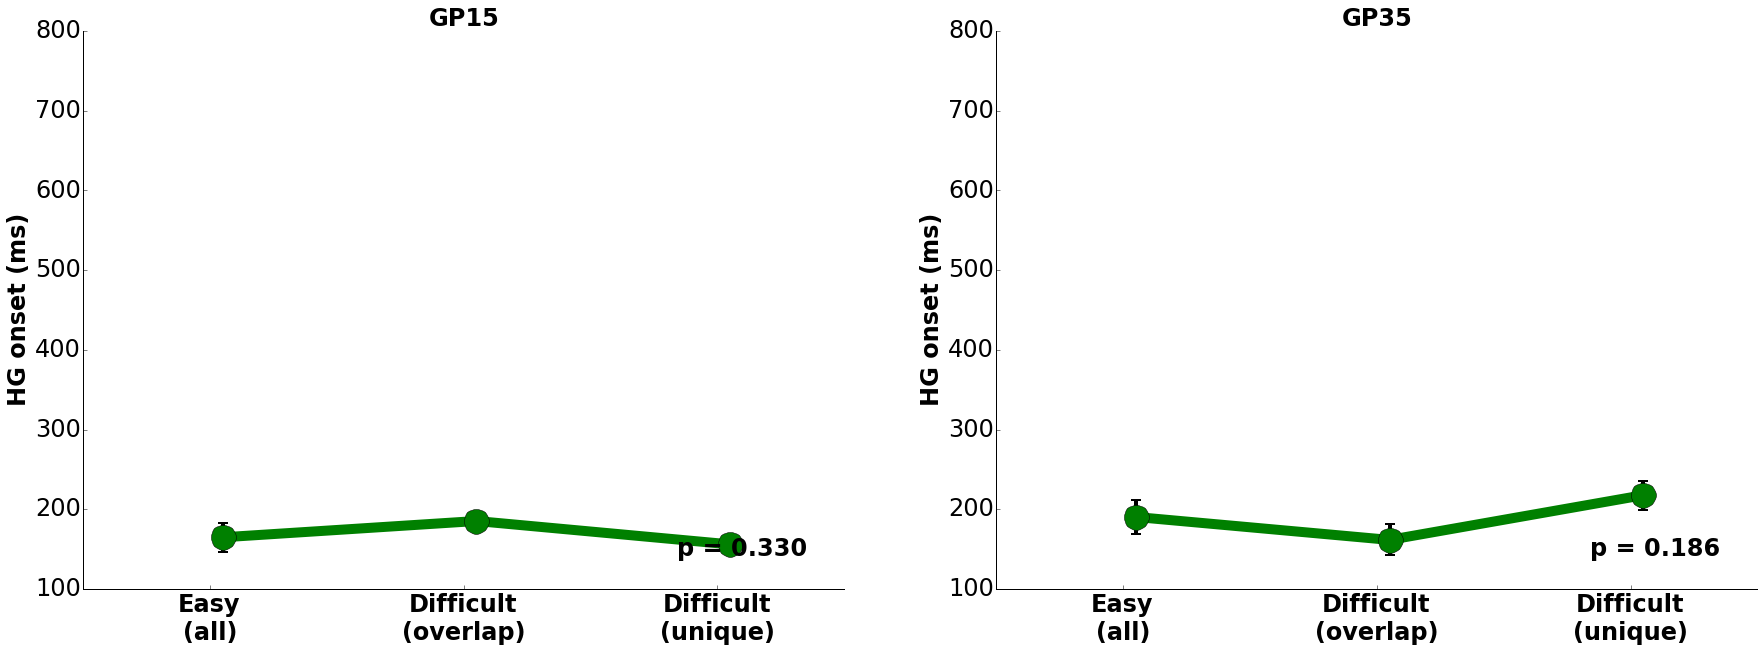

In [163]:
#make line graphs unique vs common for each subject - EmoGen / EmoRep /SelfAud

subjs = ['JH2','GP15','GP35']
#subjs = ['GP15','GP35']

f,ax = plt.subplots(1,2, figsize = (30,10))

for i, s in enumerate(subjs):
    #load data
    filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', s+'_ovelapped_dur_elecs.csv')
    df = pd.read_csv(filename)

    #get unique and overlap
    diff_unique = df.difficult_start_idx.iloc[df.unique_to_diff.dropna().index] #difficult unique elecs
    diff_overlap = df.difficult_start_idx[df.difficult.isin(df.overlapped_elecs.dropna().values)] #difficult overlapped elecs
    easy_all = df.easy_start_idx
    
    #plot
    x = (0.05, 1.05, 2.05)
    y = (easy_all.mean(), diff_overlap.mean(), diff_unique.mean())
    yerr = (easy_all.std()/np.sqrt(easy_all.dropna().shape[0]), diff_overlap.std()/np.sqrt(diff_overlap.shape[0]), diff_unique.std()/np.sqrt(diff_overlap.shape[0]))

    ax[i].errorbar(x, y, yerr = yerr, fmt = '-', linewidth = 4, c = 'black', capsize=5, capthick=2)
    ax[i].plot(x, y, linestyle="solid", marker="o", linewidth  = 10, markersize = 25)

    ind = np.arange(3)
    width = 0.35  
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].set_xlim([-.5, 2.5])
    ax[i].set_ylim([100, 800])
    ax[i].set_title(s, weight = 'bold', fontsize = 24)

    ax[i].yaxis.set_tick_params(labelsize = 24)
    ax[i].set_ylabel('HG onset (ms)',weight = 'bold', fontsize = 24)
    xTickMarks = ['Easy\n(all)','Difficult\n(overlap)', 'Difficult\n(unique)']
    ax[i].set_xticks([0,1,2])
    xtickNames = ax[i].set_xticklabels(xTickMarks, fontsize = 24, weight = 'bold')
    u, p = stats.mannwhitneyu(diff_overlap, diff_unique)
    ax[i].text(0.95, 0.05, 'p = %.3f' %(p), transform = ax[i].transAxes, verticalalignment = 'bottom', horizontalalignment = 'right', fontsize = 24, weight = 'bold')

filename = os.path.join(savedir, 'unique_vs_overlap_faces.png')
plt.savefig(filename)
print savedir

In [374]:
s = 'GP15'
filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', s+'_ovelapped_dur_elecs.csv')
df = pd.read_csv(filename)

#get unique and overlap
diff_unique = df.difficult_start_idx.iloc[df.unique_to_diff.dropna().index] #difficult unique elecs
diff_overlap = df.difficult_start_idx[df.difficult.isin(df.overlapped_elecs.dropna().values)] #difficult overlapped elecs
easy_overlap = df.easy_start_idx[df.easy.isin(df.overlapped_elecs.dropna().values)]


In [375]:
easy_overlap.mean()

349.33333333333331

In [182]:
import brain_clusters

In [148]:
np.unique((df.easy.fillna(0) + df.difficult.fillna(0)).values)

array([  4.,   5.,   7.,  11.,  12.,  19.,  24.,  27.,  32.,  33.,  34.,
        35.,  41.,  42.,  45.,  46.,  55.])

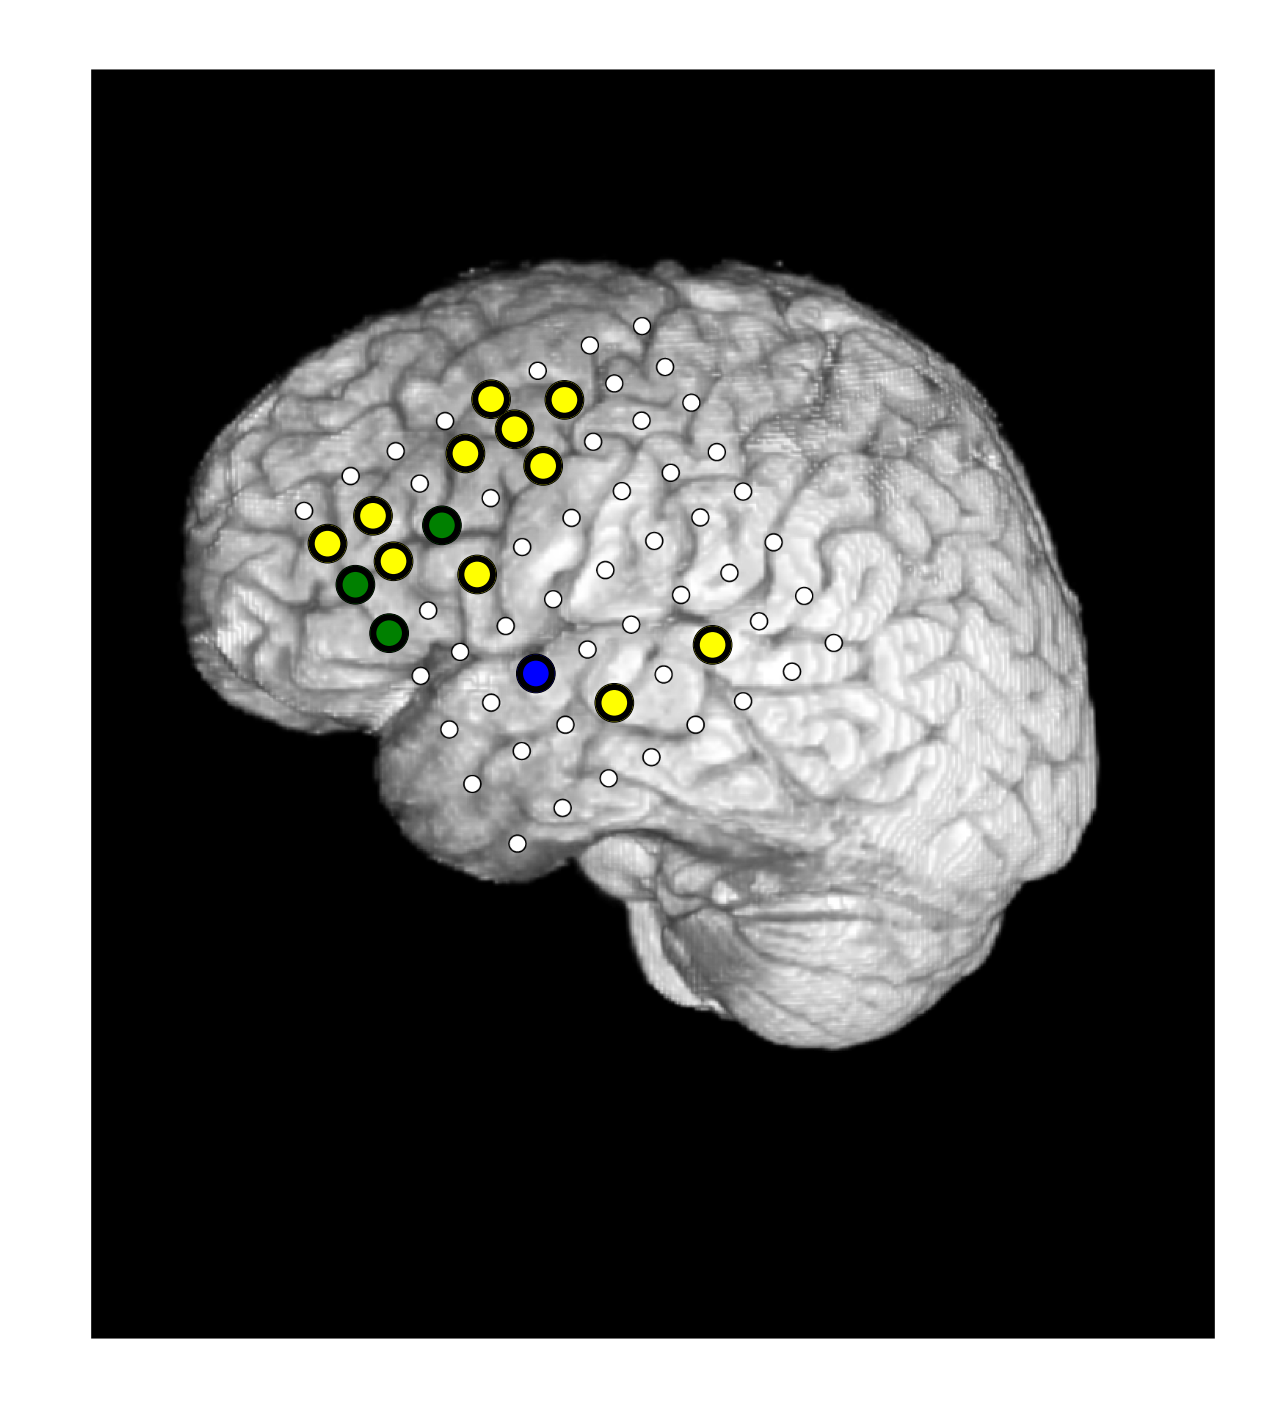

In [185]:
#brain plots of unique vs overlap for EmoGen/EmoRep
subj = 'GP15'
reconfile = 'GP15_Lateral_Left_blankelecs.png'

#subj = 'JH2'
#reconfile = 'JH2_recon.png'

#subj = 'GP315'
#reconfile = 'GP35_recon.png'

overlapfile = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', subj+'_ovelapped_dur_elecs.csv')
df = pd.read_csv(overlapfile)

overlapped_elecs = df.overlapped_elecs.values
unique_to_diff = df.unique_to_diff.values
unique_to_easy = df.unique_to_easy.values
colors = ['green','yellow','blue']

#open xycoords dictionary                                                                                           
filename = '/home/knight/matar/MATLAB/DATA/Avgusta/Subjs/'+subj+'/xycoords.p' #edit for GP35
with open(filename, 'r') as f:
    xycoords = pickle.load(f)
    f.close()

xycoords = pd.DataFrame(np.array(xycoords.values()), columns=['x_2d', 'y_2d'], index=np.array(xycoords.keys())+1)

#create weights (tag each electrode as 1, 2, 3 based on if overlapped or unique)
weights = df[['overlapped_elecs','unique_to_diff','unique_to_easy', 'difficult','easy']]
tmp = pd.DataFrame()
tmp['elecs'] = weights.easy.fillna(0) + weights.difficult.fillna(0)
tmp['overlapped_elecs'] = weights.overlapped_elecs * 0 + 1
tmp['unique_to_diff'] = weights.unique_to_diff * 0 + 2
tmp['unique_to_easy'] = weights.unique_to_easy * 0 + 3
tmp = tmp.fillna(0)
tmp['group'] = tmp.overlapped_elecs + tmp.unique_to_diff + tmp.unique_to_easy
tmp = tmp.set_index('elecs')
weights = tmp.loc[tmp.group>0]

#create list of colors for scatter
c = list()
u = np.unique(weights.group)
for i in weights.group:
    idx = np.where(u == i)
    c.append(colors[idx[0]])

custom_cmap = matplotlib.colors.ListedColormap(c, name = 'custom_cmap')

f, ax3 = plt.subplots(figsize = (25,25))

#plot recon
brain_clusters.plot_xy_map(weights['group'], locs = xycoords.loc[weights.index], ax = ax3, szmult=1500, colors = c, cmap = custom_cmap, im_path = os.path.join(datadir,'Subjs', subj, reconfile))    

#outline elecs
x = xycoords.loc[weights.index]['x_2d']
y = xycoords.loc[weights.index]['y_2d']
ax3.scatter(x, y, facecolors = 'None', edgecolor = 'black', s = 1000, linewidth = 6)

plt.savefig(os.path.join(SJdir, 'PCA', 'ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'images', subj+'_ovelapped_dur_elecs.png'), transparent = True)


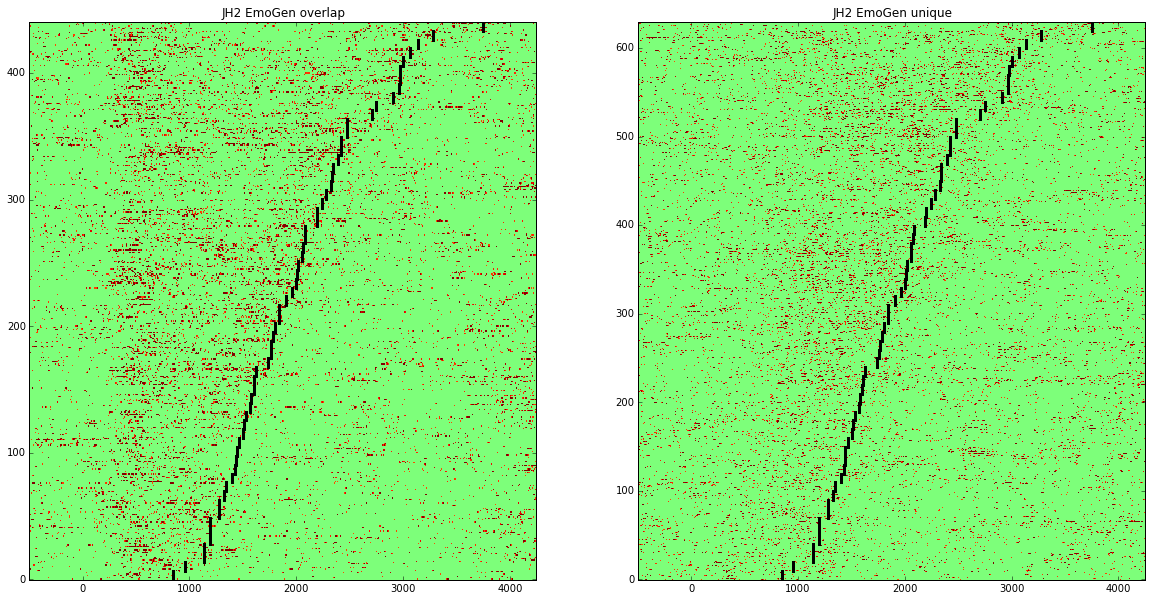

In [45]:
#single trials of overlap and unique elecs for each subj/task
#print EmoGen[unique_to_Gen]
#df[(df.subj == 'JH2') & (df.task == 'EmoGen') & (df.elec.isin(EmoGen[overlapped_elecs_Gen].elec))]
subj, task = ('JH2','EmoGen')

filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_zscore_unsmoothed.mat')
data_dict = loadmat.loadmat(filename)
data = data_dict['data_zscore']
active_elecs = data_dict['active_elecs']
RTs = data_dict['RTs']

#overlap
elecs = EmoGen[overlapped_elecs_Gen].elec #overlapped elecs
eidx = np.in1d(active_elecs, elecs)

RTs_all = np.tile(RTs, sum(eidx))
datastack = np.vstack(data[eidx,:,:])

i = np.argsort(RTs_all)
alldata_overlap = datastack[i,:]
allRTs_overlap = RTs_all[i]

#unique
elecs = EmoGen[unique_to_Gen].elec #unique elecs
eidx = np.in1d(active_elecs, elecs)

RTs_all = np.tile(RTs, sum(eidx))
datastack = np.vstack(data[eidx,:,:])

i = np.argsort(RTs_all)
alldata_unique = datastack[i,:]
allRTs_unique = RTs_all[i]
    
#plot
f,ax = plt.subplots(1,2,figsize = (20, 10))

ax[0].autoscale(enable = True, tight = True)
cax = ax[0].pcolormesh(np.arange(-500, alldata_overlap.shape[1]-500), np.arange(0, len(allRTs_overlap)), alldata_overlap * (abs(alldata_overlap)>1.96), zorder = 0)#, cmap = plt.get_cmap('bwr_r'))
cax.set_clim(vmin=-3,vmax=3)

for j in np.arange(len(allRTs_overlap)):
    ax[0].plot((allRTs_overlap[j], allRTs_overlap[j]), (j-0.5, j+0.5), 'k', linewidth = 3,zorder = 1)
ax[0].set_title('%s %s overlap' %(subj, task))

ax[1].autoscale(enable = True, tight = True)
cax = ax[1].pcolormesh(np.arange(-500, alldata_unique.shape[1]-500), np.arange(0, len(allRTs_unique)), alldata_unique * (abs(alldata_unique)>1.96), zorder = 0)#, cmap = plt.get_cmap('bwr_r'))
#cbar = f.colorbar(cax, ticks = [-150, 0 , 150], orientation = 'vertical')
cax.set_clim(vmin=-3,vmax=3)

for j in np.arange(len(allRTs_unique)):
    ax[1].plot((allRTs_unique[j], allRTs_unique[j]), (j-0.5, j+0.5), 'k', linewidth = 3,zorder = 1)
ax[1].set_title('%s %s unique' %(subj, task))



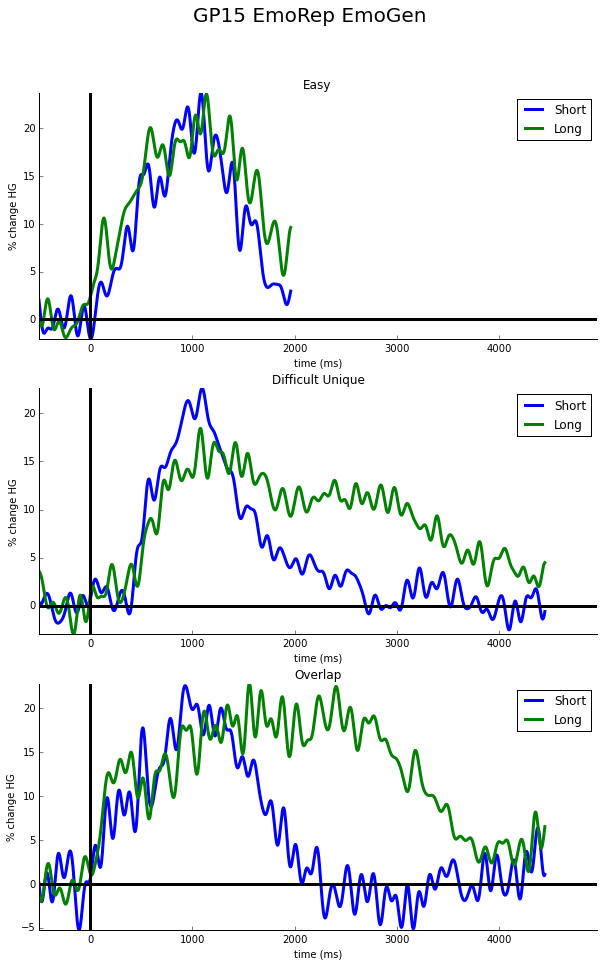

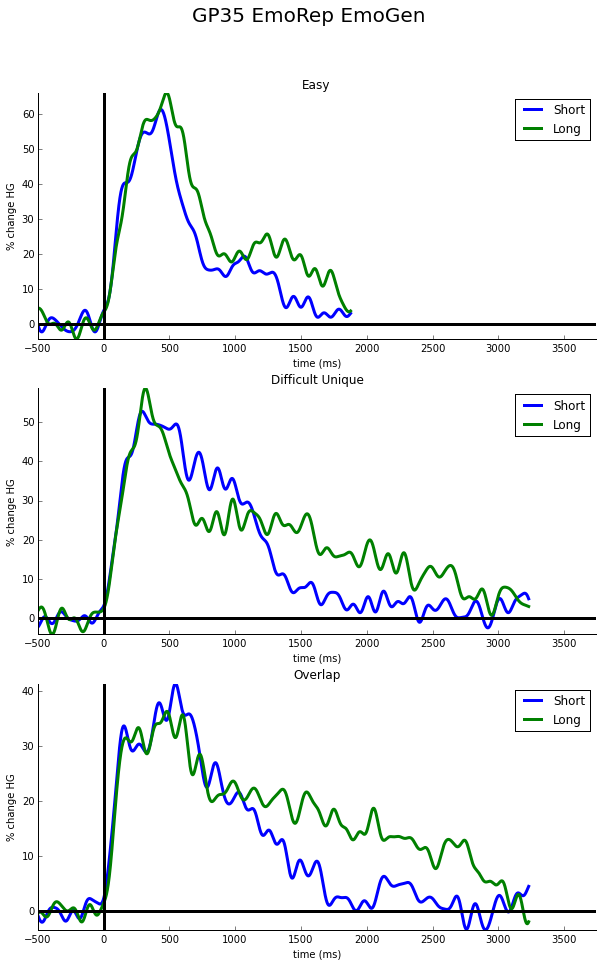

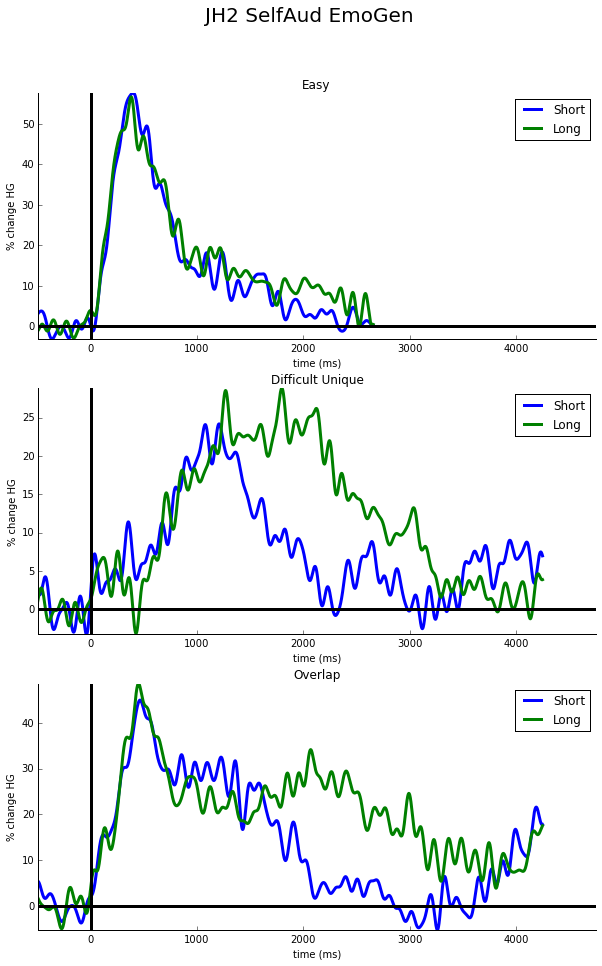

In [265]:
# calculate electrode overlap between EmoGen & EmoRep/SelfAud 
# mean onset of overlapped electrodes
# mean onset of EmoGen-unique electrodes
alldata_unique = list()
alldata_overlap = list()
datasets = ['GP15_EmoGen_EmoRep','GP35_EmoGen_EmoRep','JH2_EmoGen_SelfAud']
subjs = ['JH2','GP15','GP35']

filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
df = df.query("subj in ['JH2', 'GP35', 'GP15']")
df = df[df.pattern == 'D']

'''
for j in datasets:
    subj, difftask, easytask = j.split('_')

    difficult = df[(df.subj == subj) & (df.task == difftask)][['elec','start_idx']]
    easy = df[(df.subj == subj) & (df.task == easytask)][['elec','start_idx']]
    
    if subj == 'GP15':
        difficult = difficult.query('elec not in [66, 67, 68]')
        easy = easy.query('elec not in [66, 67, 68]')
    
    unique_to_diff = difficult.elec[~(np.in1d(difficult.elec, easy.elec))] #elecs that only in difficult
    unique_to_easy = easy.elec[~(np.in1d(easy.elec, difficult.elec))] #elecs that only in easy
    overlapped_elecs = difficult.elec[np.in1d(difficult.elec, easy.elec)] #elecs that both in easy and difficult

    data_dict = {'subj':subj, 'easytask':easytask, 'difftask':difftask, 'difficult':difficult.elec, 'difficult_start_idx':difficult.start_idx, 'easy':easy.elec,'easy_start_idx':easy.start_idx, 'unique_to_diff':unique_to_diff, 'unique_to_easy':unique_to_easy,'overlapped_elecs':overlapped_elecs}

    filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', subj+'_ovelapped_dur_elecs.csv')
    #pd.DataFrame(data_dict).to_csv(filename, index = False)
'''

for j in datasets:

    subj, difftask, easytask = j.split('_')
    
    #load dataframe
    filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', subj+'_ovelapped_dur_elecs.csv')
    df = pd.read_csv(filename)

    #get unique and overlap
    diff_unique = df.unique_to_diff.dropna() #difficult unique
    overlap = df.overlapped_elecs.dropna() # overlap
    easy = df.easy.dropna() #easy

    #load data -diff
    edataShort_diff, edataLong_diff, edataShort_easy, edataLong_easy, edataShort_over ,edataLong_over = [pd.DataFrame() for i in range(6)]
    for e in diff_unique:
        data_path = os.path.join(SJdir, 'PCA','ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', ''.join([subj, difftask, '_', 'Long_vs_Short', '_e', str(int(e)), '.p']))
        with open(data_path, 'r') as x:
            data_dict = pickle.load(x)
            x.close()
        edataShort, edataLong = [data_dict.get(k) for k in ['edataShort','edataLong']]
        edataShort_diff = edataShort_diff.append(pd.DataFrame(edataShort))
        edataLong_diff = edataLong_diff.append(pd.DataFrame(edataLong))
 
    #load data -easy
    for e in easy:
        data_path = os.path.join(SJdir, 'PCA','ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', ''.join([subj, easytask, '_', 'Long_vs_Short', '_e', str(int(e)), '.p']))
        with open(data_path, 'r') as x:
            data_dict = pickle.load(x)
            x.close()
        edataShort, edataLong = [data_dict.get(k) for k in ['edataShort','edataLong']]
        edataShort_easy = edataShort_easy.append(pd.DataFrame(edataShort))
        edataLong_easy = edataLong_easy.append(pd.DataFrame(edataLong))  
    
    #load data -overlap
    for e in overlap:
        data_path = os.path.join(SJdir, 'PCA','ShadePlots_hclust', 'elecs', 'significance_windows', 'smoothed', 'mean_traces', 'csv_files', ''.join([subj, difftask, '_', 'Long_vs_Short', '_e', str(int(e)), '.p']))
        with open(data_path, 'r') as x:
            data_dict = pickle.load(x)
            x.close()
        edataShort, edataLong, bl_st = [data_dict.get(k) for k in ['edataShort','edataLong', 'bl_st']]
        edataShort_over = edataShort_over.append(pd.DataFrame(edataShort))
        edataLong_over = edataLong_over.append(pd.DataFrame(edataLong))  
    
    #plot
    f, ax = plt.subplots(3, 1, figsize = (10,15))
    plt.suptitle(' '.join([subj, easytask, difftask]), fontsize = 20)

    #easy
    data = edataShort_easy.mean(axis = 0)
    ax[0].plot(np.arange(bl_st, data.shape[0]+bl_st), data, zorder = 1, linewidth = 3, label = "Short")
    data = edataLong_easy.mean(axis = 0)
    ax[0].plot(np.arange(bl_st, data.shape[0]+bl_st), data, zorder = 1, linewidth = 3, label = "Long")
    ax[0].set_title('Easy')
    
    #difficult
    data = edataShort_diff.mean(axis = 0)
    ax[1].plot(np.arange(bl_st, data.shape[0]+bl_st), data, zorder = 1, linewidth = 3, label = "Short")
    data = edataLong_diff.mean(axis = 0)
    ax[1].plot(np.arange(bl_st, data.shape[0]+bl_st), data, zorder = 1, linewidth = 3, label = "Long")
    ax[1].set_title('Difficult Unique')
               
    #overlap
    data = edataShort_over.mean(axis = 0)
    ax[2].plot(np.arange(bl_st, data.shape[0]+bl_st), data, zorder = 1, linewidth = 3, label = "Short")
    data = edataLong_over.mean(axis = 0)
    ax[2].plot(np.arange(bl_st, data.shape[0]+bl_st), data, zorder = 1, linewidth = 3, label = "Long")
    ax[2].set_title('Overlap')
       
    for i in range(3):
        ax[i].axhline(y = 0, color = 'k', lw = 3, label = None) 
        ax[i].axvline(x = 0, color = 'k', lw = 3, label = None)
        ax[i].set_ylabel('% change HG')
        ax[i].set_xlabel('time (ms)')
        ax[i].autoscale(tight=True)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].get_xaxis().tick_bottom()
        ax[i].get_yaxis().tick_left()
        legend1 = ax[i].legend(loc = 'best')
        ax[i].set_xlim([-500, edataLong_diff.mean(axis = 0).shape[0]])


    filename = os.path.join(SJdir, 'PCA', 'ShadePlots_hclust','elecs','significance_windows', 'smoothed', 'mean_traces', 'images', 'median_split', '_'.join([subj,'easy_diff_overlap_unique_short_long']))
    plt.savefig(filename+'.png')
    #plt.close()
 

In [350]:
#calculate number of duration elecs that active in more than one task
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs.csv')
df = pd.read_csv(filename)
active_in_multiple = 0
total_elecs = 0

for df_subj in df[df.pattern == 'D'][['subj','task','elec']].groupby(['subj']):
    df_subj = df_subj[1]
    if len(unique(df_subj.task))==1: #skip subjs with only 1 task
        continue
    all_elecs = len(df_subj.elec.value_counts()) # all active elecs
    idx = (df_subj.elec.value_counts())>1 #active in more than one task
    elecs = idx[idx == True].index
    
    active_in_multiple = active_in_multiple + len(elecs)
    total_elecs = total_elecs + all_elecs
    
print active_in_multiple / total_elecs

#for subjects with >3 tasks
for df_subj in df[df.pattern == 'D'][['subj','task','elec']].groupby(['subj']):
    df_subj = df_subj[1]
    if len(unique(df_subj.task))<4: #skip subjs with less than 4 tasks
        continue
    all_elecs = len(df_subj.elec.value_counts()) # all active elecs
    idx = (df_subj.elec.value_counts())>1 #active in more than one task
    elecs = idx[idx == True].index
    
    active_in_multiple = active_in_multiple + len(elecs)
    total_elecs = total_elecs + all_elecs
    
print active_in_multiple / total_elecs

#LPFC only
LPFC = ['Broca','FrPole','IFG','MFG','MFG_premot','OFC','PreSMA','Pre_centrl','SFG','SMA','dACC','preSMA']
dfLPFC = df[df.ROI.isin(LPFC)]

active_in_multiple = 0
total_elecs = 0

for df_subj in dfLPFC[dfLPFC.pattern == 'D'][['subj','task','elec']].groupby(['subj']):
    df_subj = df_subj[1]
    if len(unique(df_subj.task))==1: #skip subjs with only 1 task
        continue
    all_elecs = len(df_subj.elec.value_counts()) # all active elecs
    idx = (df_subj.elec.value_counts())>1 #active in more than one task
    elecs = idx[idx == True].index
    
    active_in_multiple = active_in_multiple + len(elecs)
    total_elecs = total_elecs + all_elecs
    
print active_in_multiple / total_elecs


0.590476190476
0.61581920904
0.68


In [340]:
df_subj.elec.value_counts().sum()

6

In [327]:
unique(df_subj.task)

array(['EmoGen', 'EmoRep', 'FaceEmo', 'FaceGen', 'SelfAud', 'SelfVis'], dtype=object)